Group Number: 10

Names: **Chan**, C., **De Jose**, B., **Esquillo**, V., & **Pasia**, A.

Final Project: Storytelling with Data

# How does the Philippines Compare with fellow ASEAN Nations?

## Notebook Primer

**Rationale** 

News headlines often articulate the shortcomings or incompetence of the Philippines in different metrics. But is that really the case? Do Filipinos really have it bad at present? What about before? 

It is unfair to compare the Philippines to super power countries in answering this question, and it is for this reason that the study group chose its fellow ASEAN Nations -- Philippines' most immediate neighbors -- as the baseline for comparison.

**Areas of Comparison**

The areas of comparison for Philippines, and to an effect, each ASEAN Nation, will be: Economic Fitness, Environment, Social, Governance, and their Overall COVID-19 Response

**Datasets**

The study group will be utilizing four datasets, 2 of which came from World Bank, 1 from WHO, and the last one from Oxford. These are briefly defined below

1. **Economic Fitness Dataset**
    > is the measure of a country’s diversification and ability to produce complex goods on a globally competitive basis
2. **Environmental, Social, and Governance Dataset**
    > has 67 indicators for Environmental, Social and Governance aspects
    
    For the indicators, the study group chose the following indicators
    
    <b>Environmental:</b>  
    > <b><i>Natural resource depletion</i></b> is the sum of net forest depletion, energy depletion, and mineral depletion. Net forest depletion is unit resource rents times the excess of roundwood harvest over natural growth. Energy depletion is the ratio of the value of the stock of energy resources to the remaining reserve lifetime. It covers coal, crude oil, and natural gas. Mineral depletion is the ratio of the value of the stock of mineral resources to the remaining reserve lifetime). It covers tin, gold, lead, zinc, iron, copper, nickel, silver, bauxite, and phosphate.

    <b>Social:</b>  
    > <b><i>Voice and Accountability</i></b> captures perceptions of the extent to which a country's citizens are able to participate in selecting their government, as well as freedom of expression, freedom of association, and a free media. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.

    <b>Governance:</b>  
    > <b><i>Government Effectiveness</i></b> captures perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.
    
3. **WHO COVID-19 Global Dataset**
    > Contains the global data regarding COVID-19
4. **Oxford COVID-19 Government Response Tracker**

    The Oxford Blavatnik School of Government defines this dataset as
    
    > Governments are taking a wide range of measures to tackle the COVID-19 outbreak. We aim to track and compare worldwide government responses to the coronavirus rigorously and consistently. Systematic information on which measures governments take, and when, can help us understand the responses in a consistent way, aiding efforts to fight the pandemic.
    >
    > Our team collects information on common policy responses, scores the stringency of such measures, and aggregates these into a Stringency Index.

Note: All latest data used in the analyses were held only up until December 31, 2020.
    
### Notebook Flow

The study group followed a modular approach as to make it easier to manage the program. Cleaning and processing the datasets required a case-to-case approach, thus, as seen below, each cleaning and processing task was implemented using a function specific to each dataset. In this regard, comments were provided in each function to aid the reader.

With regards to the general flow of the notebook, the block diagram below summarizes the process

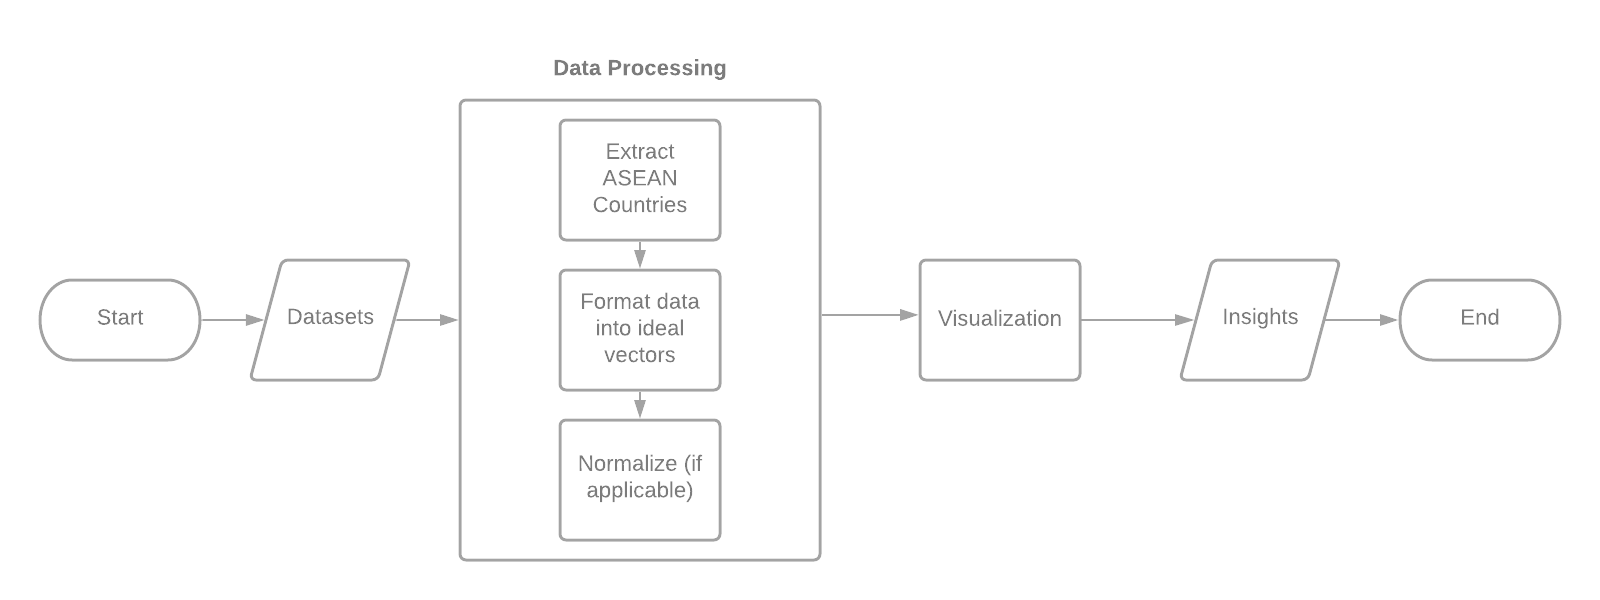

Only brief observations were included in this notebook, and further discussions on project matters are discussed on the presentation

# Load Packages and Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# this cell does indeed take a while to process
# openpyxl is needed for opening the xlsx file for pandas

df_econ = pd.read_csv('data/economic_Data.csv')
df_esg = pd.read_csv('data/ESGData.csv')
df_covid = pd.read_csv('data/WHO-COVID-19-global-data.csv')
df_govres = pd.read_excel('data/OxCGRT_timeseries_all.xlsx', 
                          sheet_name = 'government_response_index')

The function <code>info_prime(df)</code> will be used to gain initial insights into the structure of each dataset.

# Data Processing Proper

In [3]:
def info_prime(df):
    
    """General Dataset Information
    
    This functions returns the following: 
    (1) Dataset Summary,  (2) First 5 Rows; and 
    (3) Last 5 rows
    
    Is used for preliminary insight"""
    
    attr_list = [df.info(), df.head(), df.tail()]
    
    i = 0;
    while i < len(attr_list):
        display(attr_list[i])
        i += 1

## Economic Fitness Dataset

In [4]:
info_prime(df_econ)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    298 non-null    object 
 1   Country Code    298 non-null    object 
 2   Indicator Name  298 non-null    object 
 3   Indicator Code  298 non-null    object 
 4   1995            294 non-null    float64
 5   1996            294 non-null    float64
 6   1997            294 non-null    float64
 7   1998            294 non-null    float64
 8   1999            294 non-null    float64
 9   2000            294 non-null    float64
 10  2001            294 non-null    float64
 11  2002            294 non-null    float64
 12  2003            294 non-null    float64
 13  2004            294 non-null    float64
 14  2005            296 non-null    float64
 15  2006            298 non-null    float64
 16  2007            298 non-null    float64
 17  2008            298 non-null    flo

None

Country Name Country Code                                  Indicator Name  \
0  Afghanistan          AFG                         Economic Fitness Metric   
1  Afghanistan          AFG  Economic Fitness Ranking (1 = high, 149 = low)   
2       Angola          AGO                         Economic Fitness Metric   
3       Angola          AGO  Economic Fitness Ranking (1 = high, 149 = low)   
4      Albania          ALB                         Economic Fitness Metric   

   Indicator Code          1995           1996           1997          1998  \
0  EF.EFM.OVRL.XD  6.894800e-02   6.449100e-02   2.192500e-01  8.800900e-02   
1  EF.EFM.RANK.XD  9.900000e+01   1.060000e+02   8.100000e+01  1.080000e+02   
2  EF.EFM.OVRL.XD  3.140000e-61  2.210000e-105  3.860000e-113  3.310000e-18   
3  EF.EFM.RANK.XD  1.470000e+02   1.470000e+02   1.460000e+02  1.460000e+02   
4  EF.EFM.OVRL.XD  1.901100e-01   4.401200e-01   3.758900e-01  4.308100e-01   

           1999          2000  ...          2007          2008          2009  \
0  1.412700e-01  2.320000e-01  ...  1.454900e-01  2.075800e-01  6.219400e-01   
1  9.900000e+01  8.600000e+01  ...  9.900000e+01  9.100000e+01  6.700000e+01   
2  1.600000e-20  5.660000e-41  ...  3.950000e-84  4.540000e-70  5.010000e-21   
3  1.460000e+02  1.460000e+02  ...  1.470000e+02  1.480000e+02  1.480000e+02   
4  4.499400e-01  5.493900e-01  ...  4.816200e-01  8.683600e-01  8.908600e-01   

            2010           2011        2012           2013           2014  \
0   3.112900e-01   1.004800e-01    0.077571   1.015700e-01   5.349700e-02   
1   8.300000e+01   1.050000e+02  106.000000   1.010000e+02   1.120000e+02   
2  5.030000e-194  4.890000e-253    0.000000  3.810000e-171  3.890000e-233   
3   1.480000e+02   1.480000e+02  147.500000   1.480000e+02   1.470000e+02   
4   4.264100e-01   4.132700e-01    0.428530   4.238000e-01   3.423200e-01   

           2015  Unnamed: 25  
0  5.369534e-02          NaN  
1  1.120000e+02          NaN  
2  7.890000e-13          NaN  
3  1.460000e+02          NaN  
4  3.746223e-01          NaN  

[5 rows x 26 columns]

Country Name Country Code  \
293  South Africa          ZAF   
294        Zambia          ZMB   
295        Zambia          ZMB   
296      Zimbabwe          ZWE   
297      Zimbabwe          ZWE   

                                     Indicator Name  Indicator Code  \
293  Economic Fitness Ranking (1 = high, 149 = low)  EF.EFM.RANK.XD   
294                         Economic Fitness Metric  EF.EFM.OVRL.XD   
295  Economic Fitness Ranking (1 = high, 149 = low)  EF.EFM.RANK.XD   
296                         Economic Fitness Metric  EF.EFM.OVRL.XD   
297  Economic Fitness Ranking (1 = high, 149 = low)  EF.EFM.RANK.XD   

          1995        1996      1997      1998      1999      2000  ...  \
293  44.000000   46.000000  49.00000  51.00000  32.00000  34.00000  ...   
294   0.069616    0.027963   0.11811   0.24401   0.25267   0.19920  ...   
295  98.000000  122.000000  98.00000  86.00000  82.00000  91.00000  ...   
296   0.407790    0.193330   0.15889   0.26544   0.31290   0.43621  ...   
297  63.000000   81.000000  91.00000  83.00000  77.00000  72.00000  ...   

           2007        2008        2009        2010        2011        2012  \
293   47.000000   50.000000   46.000000   47.000000   47.000000   46.000000   
294    0.077562    0.088999    0.097619    0.071232    0.052598    0.072511   
295  114.000000  110.000000  109.000000  113.000000  115.000000  108.000000   
296    0.276560    0.273630    0.172350    0.146910    0.159750    0.140470   
297   84.000000   85.000000   97.000000   98.000000   95.000000   96.000000   

          2013        2014        2015  Unnamed: 25  
293   47.00000   44.000000   45.000000          NaN  
294    0.11341    0.071836    0.065307          NaN  
295  100.00000  107.000000  109.000000          NaN  
296    0.15179    0.163950    0.107817          NaN  
297   93.00000   93.000000  100.000000          NaN  

[5 rows x 26 columns]

### Initialize Data Processing Functions

In [5]:
def asean_econ(df):
    
    """Extracts ASEAN Countries from the Dataset; a function to be used for cleaning.
    
    Is necessary to check if all 10 ASEAN Nations are within the Dataset"""
    
    asean_list = ['Brunei', 'Brunei Darussalam','Cambodia','Indonesia', 'Laos',
                  'Lao PDR', "Lao People's Democratic Republic",'Malaysia', 
                  'Myanmar', 'Philippines','Singapore', 'Thailand',
                  'Vietnam', 'Viet Nam']
    
    #drops the unnecessary columns
    to_drop = ['index', 'Country Code', 'Indicator Code', 'Unnamed: 25']
    df = df[df['Country Name'].isin(asean_list)].reset_index().drop(columns = to_drop)

    print('ASEAN countries extracted and unnecessary columns dropped')
    print('--------------------------------------------------------')
    #Check if unecessary columns remain
    print('Columns Remaining: ', df.columns, sep='\n')
    #Check if all ASEAN Nations were extracted; there should be 10 countries
    print('Countries Extracted: ', df['Country Name'].unique(), sep='\n')
    print('-------------------------------------------------------')
    return df

def clean_econ(df):
    
    """Cleans the Dataset; used as a Higher Order Function"""
    
    #extract the ASEAN Nations from the dataset
    df = asean_econ(df)
    
    #stores the countries into a list; for list comprehensions
    country_list = df['Country Name'].unique().tolist()
    
    df_list = []
    #extracts each country from the dataset and stores it individually into a list
    for country in country_list:
        df_list_elem = df[df['Country Name'].isin([country])]
        df_list.append(df_list_elem)
    
    #formats dataframe into ideal vectors
    #i.e. columns for features, rows for observations, and index for dates
    i = 0
    while i < len(df_list):
        df_list[i] = df_list[i].drop(columns = 'Country Name')
        df_list[i] = df_list[i].set_index('Indicator Name').transpose()
        
        #renames columns and index
        df_list[i] = df_list[i].rename_axis(None, axis = 1)
        
        #name df_list element for future use
        df_list[i].name = country_list[i]
        i += 1
    
    print('Datasets stored into list')
    return df_list

In [6]:
econ_df_list = clean_econ(df_econ)

ASEAN countries extracted and unnecessary columns dropped
--------------------------------------------------------
Columns Remaining: 
Index(['Country Name', 'Indicator Name', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')
Countries Extracted: 
['Brunei Darussalam' 'Indonesia' 'Cambodia' 'Lao PDR' 'Myanmar' 'Malaysia'
 'Philippines' 'Singapore' 'Thailand' 'Vietnam']
-------------------------------------------------------
Datasets stored into list


**Note**

If the countries extracted contained all 10 ASEAN Nations, the processing was a success. These countries were then instantiated as separate datasets from each other, which were then stored into a list. This approach was taken as the notebook revolved around list comprehensions to make our lives easier.

## ESG Dataset

In [7]:
info_prime(df_esg)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16013 entries, 0 to 16012
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    16013 non-null  object 
 1   Country Code    16013 non-null  object 
 2   Indicator Name  16013 non-null  object 
 3   Indicator Code  16013 non-null  object 
 4   1960            1352 non-null   float64
 5   1961            1945 non-null   float64
 6   1962            2183 non-null   float64
 7   1963            1958 non-null   float64
 8   1964            1970 non-null   float64
 9   1965            2011 non-null   float64
 10  1966            2012 non-null   float64
 11  1967            2252 non-null   float64
 12  1968            2030 non-null   float64
 13  1969            2042 non-null   float64
 14  1970            3087 non-null   float64
 15  1971            3595 non-null   float64
 16  1972            3837 non-null   float64
 17  1973            3592 non-null  

None

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
2  Adjusted savings: natural resources depletion ...  NY.ADJ.DRES.GN.ZS   NaN   
3  Adjusted savings: net forest depletion (% of GNI)  NY.ADJ.DFOR.GN.ZS   NaN   
4                 Agricultural land (% of land area)     AG.LND.AGRI.ZS   NaN   

        1961       1962       1963       1964       1965  ...       2013  \
0        NaN        NaN        NaN        NaN        NaN  ...  83.533457   
1        NaN        NaN        NaN        NaN        NaN  ...  88.129881   
2        NaN        NaN        NaN        NaN        NaN  ...  11.641062   
3        NaN        NaN        NaN        NaN        NaN  ...   0.055593   
4  27.835643  27.826564  27.845522  27.847925  27.866972  ...  36.534503   

        2014       2015       2016       2017       2018  2019  2020  2050  \
0  83.897596  84.171599  84.510171        NaN        NaN   NaN   NaN   NaN   
1  87.275323  88.720097  89.308602  90.283638  89.286856   NaN   NaN   NaN   
2  10.437876   6.277652   5.261868   6.385551   8.190277   NaN   NaN   NaN   
3   0.079402   0.086177   0.076670   0.085885   0.047916   NaN   NaN   NaN   
4  36.607475  36.624759  36.610850        NaN        NaN   NaN   NaN   NaN   

   Unnamed: 66  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 67 columns]

Country Name Country Code  \
16008     Zimbabwe          ZWE   
16009     Zimbabwe          ZWE   
16010     Zimbabwe          ZWE   
16011     Zimbabwe          ZWE   
16012     Zimbabwe          ZWE   

                                          Indicator Name  Indicator Code  \
16008  Strength of legal rights index (0=weak to 12=s...  IC.LGL.CRED.XQ   
16009  Terrestrial and marine protected areas (% of t...  ER.PTD.TOTL.ZS   
16010  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
16011  Unmet need for contraception (% of married wom...     SP.UWT.TFRT   
16012                 Voice and Accountability: Estimate          VA.EST   

       1960  1961  1962  1963  1964  1965  ...     2013       2014       2015  \
16008   NaN   NaN   NaN   NaN   NaN   NaN  ...  5.00000   5.000000   5.000000   
16009   NaN   NaN   NaN   NaN   NaN   NaN  ...      NaN        NaN        NaN   
16010   NaN   NaN   NaN   NaN   NaN   NaN  ...  5.39900   5.342000   5.302000   
16011   NaN   NaN   NaN   NaN   NaN   NaN  ...      NaN  10.400000  10.400000   
16012   NaN   NaN   NaN   NaN   NaN   NaN  ... -1.38622  -1.256964  -1.165902   

            2016       2017       2018      2019   2020  2050  Unnamed: 66  
16008   5.000000   5.000000   5.000000  6.000000    NaN   NaN          NaN  
16009  27.214542  27.214585  27.214585       NaN    NaN   NaN          NaN  
16010   5.253000   5.168000   5.087000  4.954000  4.991   NaN          NaN  
16011        NaN        NaN        NaN       NaN    NaN   NaN          NaN  
16012  -1.177471  -1.194492  -1.123221 -1.141875    NaN   NaN          NaN  

[5 rows x 67 columns]

### Initialize Data Processing Functions

As you can see, the indicators of interest were not immediately 'sliced' out. This enabled backtracking much easier should we have changed our minds in the middle of our analysis. 

In [8]:
def asean_esg(df):
    
    """Extracts ASEAN Countries from the Dataset; a function to be used for cleaning.
    
    Is necessary to check if all 10 ASEAN Nations are within the Dataset"""
    
    asean_list = ['Brunei', 'Brunei Darussalam','Cambodia','Indonesia', 'Laos',
                  'Lao PDR', "Lao People's Democratic Republic",'Malaysia', 
                  'Myanmar', 'Philippines','Singapore', 'Thailand',
                  'Vietnam', 'Viet Nam']
    
    #drops the unnecessary columns
    to_drop = ['index','Country Code', 'Indicator Code', 'Unnamed: 66']
    df = df[df['Country Name'].isin(asean_list)].reset_index().drop(columns = to_drop)
    
    print('ASEAN countries extracted and unnecessary columns dropped')
    print('--------------------------------------------------------')
    #Check if unecessary columns remain
    print('Columns Remaining: ', df.columns, sep='\n')
    #Check if all ASEAN Nations were extracted; there should be 10 countries
    print('Countries Extracted: ', df['Country Name'].unique(), sep='\n')
    print('-------------------------------------------------------')
    
    return df

def clean_esg(df):
    
    """Cleans the df_esg dataset"""
    
    #extract the ASEAN Nations from the dataset
    df = asean_esg(df)
    
    #stores the countries into a list; for list comprehensions
    country_list = df['Country Name'].unique().tolist()
    
    df_list = []
    #extracts each country from the dataset and stores it individually into a list
    for country in country_list:
        df_list_elem = df[df['Country Name'].isin([country])]
        df_list.append(df_list_elem)
        
    #formats dataframe into ideal vectors
    #i.e. columns for features, rows for observations, and index for dates
    i = 0
    while i < len(df_list):
        to_drop = ['Country Name', '2050']
        df_list[i] = df_list[i].drop(columns = to_drop)
        df_list[i] = df_list[i].set_index('Indicator Name').transpose()
        df_list[i] = df_list[i].rename_axis(None, axis = 1)
        
        #name df_list element for future use
        df_list[i].name = country_list[i]
        i += 1
        
    print('Datasets stored into list')
    return df_list

In [9]:
esg_df_list = clean_esg(df_esg)

ASEAN countries extracted and unnecessary columns dropped
--------------------------------------------------------
Columns Remaining: 
Index(['Country Name', 'Indicator Name', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2050'],
      dtype='object')
Countries Extracted: 
['Brunei Darussalam' 'Cambodia' 'Indonesia' 'Lao PDR' 'Malaysia' 'Myanmar'
 'Philippines' 'Singapore' 'Thailand' 'Vietnam']
-------------------------------------------------------
Datasets stored into list


**Note**

If the countries extracted contained all 10 ASEAN Nations, the processing was a success. These countries were then instantiated as separate datasets from each other, which were then stored into a list. This approach was taken as the notebook revolved around list comprehensions to make our lives easier.

## COVID-19 Datasets

### WHO COVID-19 Cases

In [10]:
info_prime(df_covid)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92081 entries, 0 to 92080
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      92081 non-null  object
 1   Country_code       91693 non-null  object
 2   Country            92081 non-null  object
 3   WHO_region         92081 non-null  object
 4   New_cases          92081 non-null  int64 
 5   Cumulative_cases   92081 non-null  int64 
 6   New_deaths         92081 non-null  int64 
 7   Cumulative_deaths  92081 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 5.6+ MB


None

Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

Date_reported Country_code   Country WHO_region  New_cases  \
92076    2021-01-20           ZW  Zimbabwe       AFRO        783   
92077    2021-01-21           ZW  Zimbabwe       AFRO        733   
92078    2021-01-22           ZW  Zimbabwe       AFRO        639   
92079    2021-01-23           ZW  Zimbabwe       AFRO        476   
92080    2021-01-24           ZW  Zimbabwe       AFRO        484   

       Cumulative_cases  New_deaths  Cumulative_deaths  
92076             28675          52                825  
92077             29408          54                879  
92078             30047          38                917  
92079             30523          45                962  
92080             31007          12                974

#### Initialize Data Processing Functions

The data processing function for the WHO COVID-19 Dataset included a normalization code block to normalize each feature. This was conducted to sort of 'scale' each variable such that it will be easier to compare. Furthermore, in case you have not noticed from the past processing functions, the attribute <code>df.name</code> was always created for each dataset so as to make it easier to distinguish which dataframe is which from the returned <code>df_list</code>. The <code>name</code> attribute was also used as a container to make it easier to name titles, and x- or y-labels when it comes to data visualization. Visualizing 10 countries per indicator is not easy you know...

In [11]:
def asean_covid(df):
    
    """Extracts ASEAN Countries from the Dataset; a function to be used for cleaning.

    
    Is necessary to check if all 10 ASEAN Nations are within the Dataset"""
    
    #extract data from 2020 only
    df['Date_reported'] = pd.to_datetime(df['Date_reported'], infer_datetime_format=True)
    df = df[(df['Date_reported'].dt.year == 2020)] 
    df.index = df['Date_reported']
    
    asean_list = ['Brunei', 'Brunei Darussalam','Cambodia','Indonesia', 'Laos',
                  'Lao PDR', "Lao People's Democratic Republic",'Malaysia', 
                  'Myanmar', 'Philippines','Singapore', 'Thailand',
                  'Vietnam', 'Viet Nam']
    
    #drops the unnecessary columns
    to_drop = ['Country_code', 'WHO_region', 'Date_reported']
    df = df[df['Country'].isin(asean_list)].drop(columns = to_drop).reset_index()
    
    print('ASEAN countries extracted and unnecessary columns dropped')
    print('--------------------------------------------------------')
    #Check if unecessary columns remain
    print('Columns Remaining: ', df.columns, sep='\n')
    #Check if all ASEAN Nations were extracted; there should be 10 countries
    print('Countries Extracted: ', df['Country'].unique(), sep='\n')
    print('-------------------------------------------------------')
    
    return df

def clean_covid(df):
    
    """Cleans the COVID-19 Dataset"""
    
    #extract the ASEAN Nations from the dataset
    df = asean_covid(df)
    
    #stores the countries into a list; for list comprehensions
    country_list = df['Country'].unique().tolist()
        
    df_list = []
    #extracts each country from the dataset and stores it individually into a list
    for country in country_list:
        df_list_elem = df[df['Country'].isin([country])]
        df_list.append(df_list_elem)    
        
    #formats dataframe into ideal vectors
    #i.e. columns for features, rows for observations, and index for dates
    i = 0
    while i < len(df_list):
        df_list[i] = df_list[i].drop(columns = 'Country')
        df_list[i] = df_list[i].set_index('Date_reported')
        df_list[i] = df_list[i].rename_axis(None, axis = 1)
        i +=1
        
    print('Datasets stored into list')
    
    ## Normalize each variable to per thousands
    
    #Population data retrieved January 25, 2021
    #from https://www.worldometers.info/population/asia/south-eastern-asia/
    pop_brunei = 439902
    pop_cambodia = 16853708
    pop_indo = 275199281
    pop_laos = 7337106
    pop_malay = 32607093
    pop_myanmar = 54619835
    pop_ph = 110429709
    pop_sg = 5876885
    pop_thai = 69900171
    pop_viet = 97338579

    pop_list = [pop_brunei, pop_cambodia, pop_indo,
           pop_laos, pop_malay, pop_myanmar,
           pop_ph, pop_sg, pop_thai, pop_viet]
    j = 0
    while j < len(pop_list):
        pop_list[j] = pop_list[j]/1e3
        j += 1
       
    k = 0 
    while k < len(df_list):
        df_list[k] = df_list[k] / pop_list[k]
        #name df_list element for future use
        df_list[k].name = country_list[k]
        k += 1
    print('Variables normalized to per thousand')
    
    return df_list

In [12]:
covid_df_list = clean_covid(df_covid)

ASEAN countries extracted and unnecessary columns dropped
--------------------------------------------------------
Columns Remaining: 
Index(['Date_reported', 'Country', 'New_cases', 'Cumulative_cases',
       'New_deaths', 'Cumulative_deaths'],
      dtype='object')
Countries Extracted: 
['Brunei Darussalam' 'Cambodia' 'Indonesia'
 "Lao People's Democratic Republic" 'Malaysia' 'Myanmar' 'Philippines'
 'Singapore' 'Thailand' 'Viet Nam']
-------------------------------------------------------
Datasets stored into list
Variables normalized to per thousand


**Note**

If the countries extracted contained all 10 ASEAN Nations, the processing was a success. These countries were then instantiated as separate datasets from each other, which were then stored into a list. This approach was taken as the notebook revolved around list comprehensions to make our lives easier.

### Government Response Index

In [13]:
info_prime(df_govres)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Columns: 368 entries, country_code to 31Dec2020
dtypes: float64(366), object(2)
memory usage: 532.0+ KB


None

country_code country_name  01Jan2020  02Jan2020  03Jan2020  04Jan2020  \
0          ABW        Aruba        0.0        0.0        0.0        0.0   
1          AFG  Afghanistan        0.0        0.0        0.0        0.0   
2          AGO       Angola        0.0        0.0        0.0        0.0   
3          ALB      Albania        0.0        0.0        0.0        0.0   
4          AND      Andorra        0.0        0.0        0.0        0.0   

   05Jan2020  06Jan2020  07Jan2020  08Jan2020  ...  22Dec2020  23Dec2020  \
0        0.0        0.0        0.0        0.0  ...      33.33      33.33   
1        0.0        0.0        0.0        0.0  ...      22.22      22.22   
2        0.0        0.0        0.0        0.0  ...      48.89      48.89   
3        0.0        0.0        0.0        0.0  ...      60.56      60.56   
4        0.0        0.0        0.0        0.0  ...      63.33      63.33   

   24Dec2020  25Dec2020  26Dec2020  27Dec2020  28Dec2020  29Dec2020  \
0      33.33      33.33      33.33      33.33      33.33      33.33   
1      22.22      22.22      22.22      22.22      22.22      22.22   
2      48.89      48.89      48.89      48.89      48.89      48.89   
3      58.33      58.33      58.33      58.33      58.33      58.33   
4      63.33      63.33      63.33      63.33      63.33      63.33   

   30Dec2020  31Dec2020  
0      33.33      33.33  
1      22.22      22.22  
2      48.89      48.89  
3      58.33      58.33  
4      63.33      63.33  

[5 rows x 368 columns]

country_code  country_name  01Jan2020  02Jan2020  03Jan2020  04Jan2020  \
180          VUT       Vanuatu        0.0        0.0        0.0        0.0   
181          YEM         Yemen        0.0        0.0        0.0        0.0   
182          ZAF  South Africa        0.0        0.0        0.0        0.0   
183          ZMB        Zambia        0.0        0.0        0.0        0.0   
184          ZWE      Zimbabwe        0.0        0.0        0.0        0.0   

     05Jan2020  06Jan2020  07Jan2020  08Jan2020  ...  22Dec2020  23Dec2020  \
180        0.0        0.0        0.0        0.0  ...      30.56      30.56   
181        0.0        0.0        0.0        0.0  ...      23.89      23.89   
182        0.0        0.0        0.0        0.0  ...      56.67      56.67   
183        0.0        0.0        0.0        0.0  ...      51.11      51.11   
184        0.0        0.0        0.0        0.0  ...      55.56      55.56   

     24Dec2020  25Dec2020  26Dec2020  27Dec2020  28Dec2020  29Dec2020  \
180      30.56      30.56      30.56      30.56      30.56      30.56   
181      23.89      23.89      23.89      23.89      23.89      23.89   
182      56.67      56.67      56.67      56.67      56.67      56.67   
183      51.11      51.11      51.11      51.11      51.11      51.11   
184      55.56      55.56      55.56      55.56      55.56      55.56   

     30Dec2020  31Dec2020  
180      25.56      25.56  
181      23.89      23.89  
182      56.67      56.67  
183      51.11      51.11  
184      55.56      55.56  

[5 rows x 368 columns]

#### Initialize Data Processing Functions

Nothing special here. This is the usual data processing code block as shown in the block diagram in the notebook primer above.

In [14]:
def asean_govres(df):
    
    """Extracts ASEAN Countries from the Dataset; a function to be used for cleaning.
    
    Is necessary to check if all 10 ASEAN Nations are within the Dataset"""
    
    asean_list = ['Brunei', 'Brunei Darussalam','Cambodia','Indonesia', 'Laos',
                  'Lao PDR', "Lao People's Democratic Republic",'Malaysia', 
                  'Myanmar', 'Philippines','Singapore', 'Thailand',
                  'Vietnam', 'Viet Nam']
    
    #drops the unnecessary columns
    to_drop = ['index', 'country_code']
    df = df[df['country_name'].isin(asean_list)].reset_index().drop(columns = to_drop)
    
    print('ASEAN countries extracted and unnecessary columns dropped')
    print('--------------------------------------------------------')
    #Check if unecessary columns remain
    print('Columns Remaining: ', df.columns, sep='\n')
    #Check if all ASEAN Nations were extracted; there should be 10 countries
    print('Countries Extracted: ', df['country_name'].unique(), sep='\n')
    print('-------------------------------------------------------')
    
    return df

def clean_govres(df):
    
    """Cleans the Oxford Dataset"""
    
    #extract the ASEAN Nations from the dataset
    df = asean_govres(df)
    
    #stores the countries into a list; for list comprehensions
    country_list = df['country_name'].unique().tolist()
        
    df_list = []
    #extracts each country from the dataset and stores it individually into a list
    for country in country_list:
        df_list_elem = df[df['country_name'].isin([country])]
        df_list.append(df_list_elem)    
        
    #formats dataframe into ideal vectors
    #i.e. columns for features, rows for observations, and index for dates
    i = 0
    while i < len(df_list):
        df_list[i] = df_list[i].set_index('country_name').transpose()
        df_list[i].index = pd.to_datetime(df_list[i].index)
        df_list[i] = df_list[i].rename_axis(None, axis = 1)
        
        #name df_list element for future use
        df_list[i].name = country_list[i]
        i +=1
        
    print('Datasets stored into list')
    
    return df_list

In [15]:
govres_df_list = clean_govres(df_govres)

ASEAN countries extracted and unnecessary columns dropped
--------------------------------------------------------
Columns Remaining: 
Index(['country_name', '01Jan2020', '02Jan2020', '03Jan2020', '04Jan2020',
       '05Jan2020', '06Jan2020', '07Jan2020', '08Jan2020', '09Jan2020',
       ...
       '22Dec2020', '23Dec2020', '24Dec2020', '25Dec2020', '26Dec2020',
       '27Dec2020', '28Dec2020', '29Dec2020', '30Dec2020', '31Dec2020'],
      dtype='object', length=367)
Countries Extracted: 
['Brunei' 'Indonesia' 'Cambodia' 'Laos' 'Myanmar' 'Malaysia' 'Philippines'
 'Singapore' 'Thailand' 'Vietnam']
-------------------------------------------------------
Datasets stored into list


**Note**

If the countries extracted contained all 10 ASEAN Nations, the processing was a success. These countries were then instantiated as separate datasets from each other, which were then stored into a list. This approach was taken as the notebook revolved around list comprehensions to make our lives easier.

# Data Visualization Proper

##  Load Packages

In [16]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

## Initialize Plotting Functions

In generating a boxplot, the study group used the <code>df.boxplot</code> approach instead of using <code>matplotlib</code>. This is because the pandas method made it easier to deal with NaNs. Using the pandas method however, does not enable us to make use of the dicitionary that is returned using <code>matplotlib</code> as containers for the legend labels. Thus in the <code>gen_boxplot(df_list, column)</code> function, it can be seen that a <code>proxy_artist</code> was used instead to create legends.

In [17]:
def name(df_list):
    
    """Used to obtain the name for each dataset when generating another one."""
    
    name_list = []
    for df in df_list:
        name_list.append(df.name)
    return name_list

def gen_df(df_list, column):
    
    """Generate DataFrame per column of interest; created to accomodate describe function per country per indicator and 
    the required format in generating a boxplot"""
    
    df_dict = {}
    name_list = name(df_list)
    i = 0
    while i < len(df_list):
        df_dict[name_list[i]] = df_list[i][column].values
        i += 1
        
    df = pd.DataFrame(data = df_dict)
    df.index = df_list[0].index
    pd.to_datetime(df.index)
    
    display(df.describe().T.sort_values(by = 'mean', ascending = False))
            
    return df

def gen_boxplot(df_list, column):
    
    """Generate boxplot for the generated dataframe per indicator; used the boxplot method for pandas because for convenience.
    Pandas df.boxplot approach drops NaN values columnwise"""
    
    df = gen_df(df_list, column)
    df.name = column
    
    #derine text params
    t_wt = 'bold'
    t_size = 'xx-large'
    
    #define artists for legend
    mean_mark = mlines.Line2D([], [], color = 'green', marker  = '^',label = 'Mean', 
                         ls = '')
    median_mark = mlines.Line2D([], [], color = 'orange',label = 'Median', 
                         ls = '-')
    outlier_mark = mlines.Line2D([], [], mec = 'black', mfc = 'white', marker  = 'o',label = 'Outlier', 
                         ls = '')
    
    #plot
    fig, ax = plt.subplots(figsize = (10,5), dpi = 300)
    
    bp = df.boxplot(ax = ax, rot = 20, showmeans = True, showfliers = True,
                    boxprops = dict(linewidth = 1),
                    medianprops = dict(linewidth=1.5),
                    meanprops = dict(marker = '^'))
    
    ax.set_title(df.name, fontsize = t_size, fontweight = t_wt)
    ax.legend(handles = [mean_mark, median_mark, outlier_mark])
    
    
    plt.show()

## Descriptive Statistics and Boxplots

For each dataset or indicator, the descriptive statistics and a boxpot is shown. The descriptive statistics is sorted by the mean, from highest to lowest, to make it easier to compare each ASEAN Nation with their performance for each metric

### Economic Fitness 

-----------------------------------------
Descriptive Statistics and Boxplot for 'Economic Fitness Metric' 


count      mean       std            min       25%  \
Thailand            21.0  2.182506  0.324422   1.532300e+00  2.051900   
Singapore           21.0  1.772365  0.191277   1.465600e+00  1.676200   
Malaysia            21.0  1.553873  0.328634   1.052800e+00  1.327900   
Indonesia           21.0  1.491691  0.192818   1.030700e+00  1.465800   
Vietnam             21.0  1.029285  0.413820   2.602600e-01  0.710280   
Philippines         21.0  1.018214  0.340984   6.780300e-01  0.775430   
Cambodia            21.0  0.169625  0.090492   2.314300e-02  0.122020   
Myanmar             21.0  0.109511  0.029387   3.291100e-02  0.099298   
Lao PDR             21.0  0.104160  0.036269   2.541500e-02  0.083057   
Brunei Darussalam   21.0  0.011890  0.015106  7.040000e-139  0.000002   

                        50%       75%       max  
Thailand           2.210700  2.415300  2.673716  
Singapore          1.754000  1.847600  2.295572  
Malaysia           1.500800  1.861500  2.133432  
Indonesia          1.564621  1.595200  1.791400  
Vietnam            1.096600  1.373400  1.571400  
Philippines        0.902000  1.059400  1.824482  
Cambodia           0.171500  0.202000  0.409337  
Myanmar            0.110840  0.130440  0.152874  
Lao PDR            0.111970  0.124460  0.180170  
Brunei Darussalam  0.007098  0.019654  0.056677

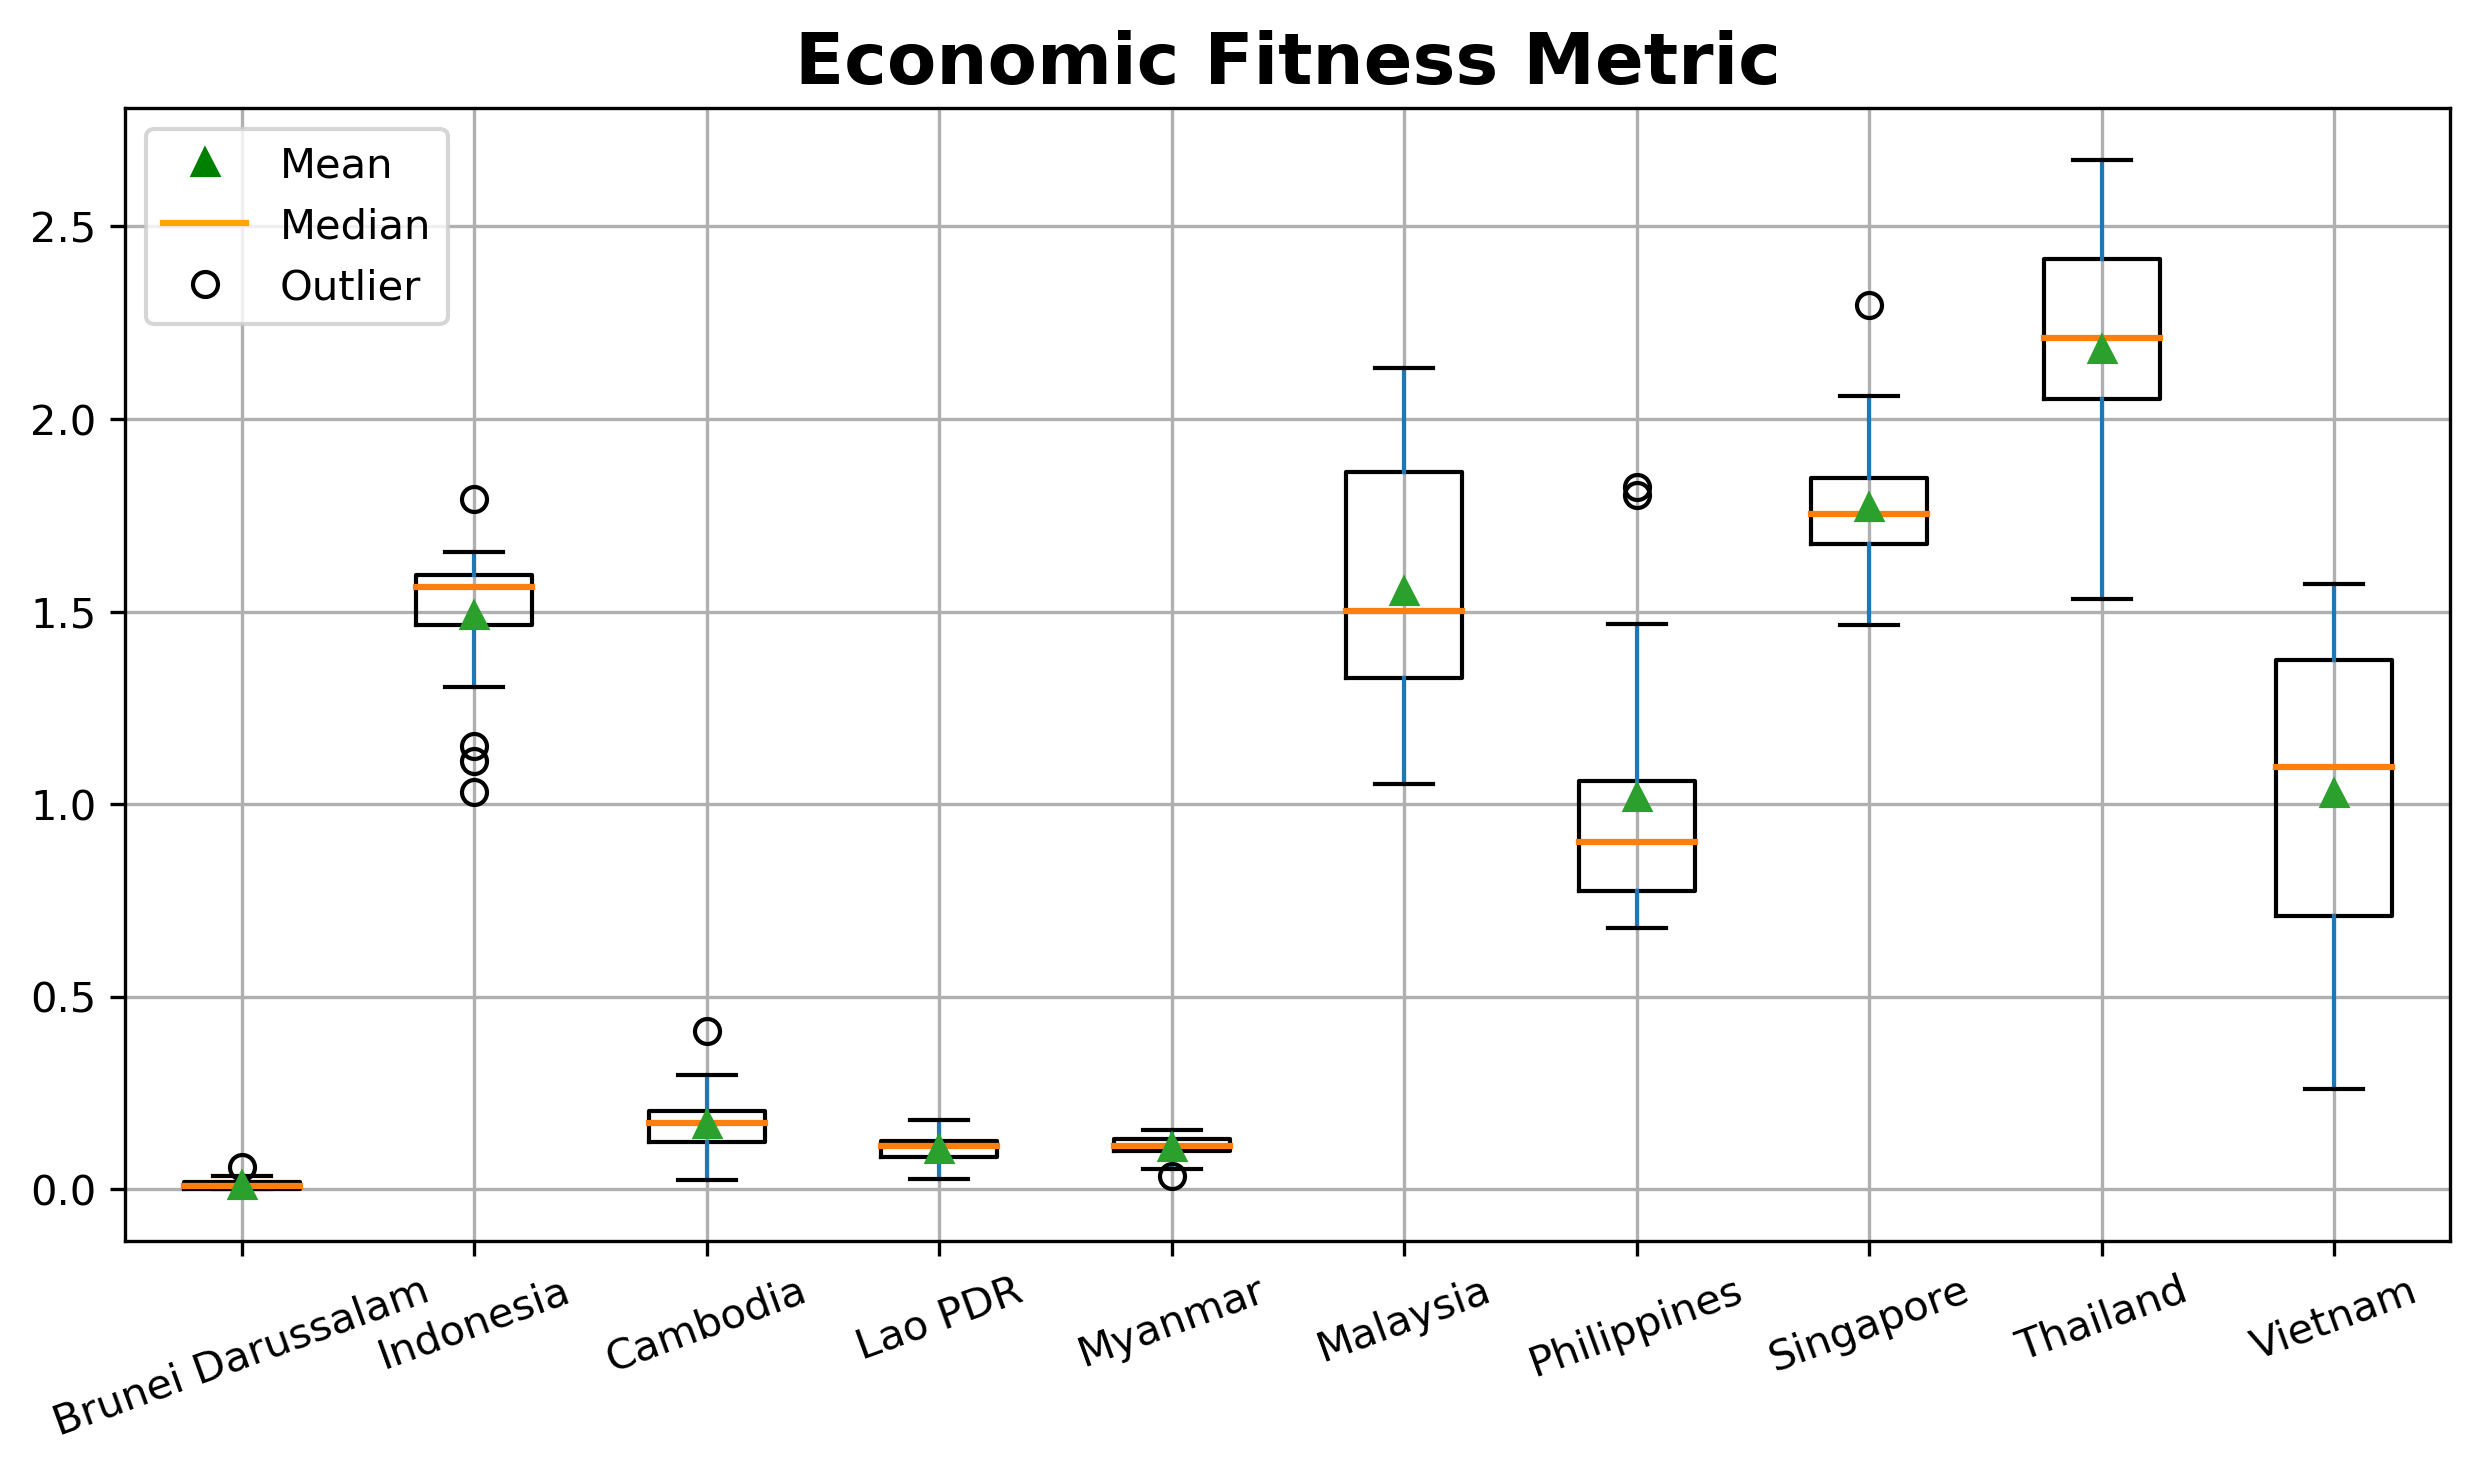

-----------------------------------------




In [18]:
col = 'Economic Fitness Metric'

print('-----------------------------------------')
txt = "Descriptive Statistics and Boxplot for '" + col + "' "
print(txt)
gen_boxplot(econ_df_list, col)
print('-----------------------------------------')
print('\n')

As observed, Philippines rank somewhere in the middle. One thing I want to point out though is that Brunei seems to be the lowest because it relies heavily on oil, prompting it not to be economically fit. This means that, if no one buys oil anymore, they will experience economic downfall.

### Environmental, and Governance

For the indicators, the study group chose the following indicators
    
<b>Environmental:</b>  
> <b><i>Natural resource depletion</i></b> is the sum of net forest depletion, energy depletion, and mineral depletion. Net forest depletion is unit resource rents times the excess of roundwood harvest over natural growth. Energy depletion is the ratio of the value of the stock of energy resources to the remaining reserve lifetime. It covers coal, crude oil, and natural gas. Mineral depletion is the ratio of the value of the stock of mineral resources to the remaining reserve lifetime). It covers tin, gold, lead, zinc, iron, copper, nickel, silver, bauxite, and phosphate.

<b>Social:</b>  
> <b><i>Voice and Accountability</i></b> captures perceptions of the extent to which a country's citizens are able to participate in selecting their government, as well as freedom of expression, freedom of association, and a free media. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.

<b>Governance:</b>  
> <b><i>Government Effectiveness</i></b> captures perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.


In [19]:
cols = ['Adjusted savings: natural resources depletion (% of GNI)', #Environmental
        'Voice and Accountability: Estimate', #Social
        'Government Effectiveness: Estimate'] #Governance

-----------------------------------------
Descriptive Statistics and Boxplot for 'Adjusted savings: natural resources depletion (% of GNI)' 


count       mean       std       min        25%        50%  \
Brunei Darussalam   30.0  15.566605  4.174550  8.539486  12.568617  14.905343   
Indonesia           49.0   6.229953  4.086891  0.249513   3.918566   5.313123   
Lao PDR             35.0   5.025913  2.524698  0.799775   3.555244   4.332880   
Vietnam             30.0   4.833473  1.715542  1.752346   3.795227   4.804432   
Malaysia            49.0   4.315210  2.208756  0.161513   3.094410   4.163123   
Myanmar             19.0   2.962865  1.020905  1.193543   2.414638   2.694882   
Cambodia            24.0   1.960822  1.406410  0.459103   1.111217   1.433858   
Philippines         48.0   1.586539  1.016448  0.302752   0.751467   1.448390   
Thailand            48.0   1.456273  0.764432  0.480534   0.866549   1.336729   
Singapore           48.0   0.000121  0.000353  0.000000   0.000000   0.000000   

                         75%        max  
Brunei Darussalam  18.779019  24.892480  
Indonesia           7.845093  22.160134  
Lao PDR             6.351996  10.903614  
Vietnam             5.849152   8.083903  
Malaysia            5.558114   9.647225  
Myanmar             3.529777   5.347948  
Cambodia            1.907453   5.667436  
Philippines         2.063541   4.910459  
Thailand            1.928097   3.312869  
Singapore           0.000052   0.001779

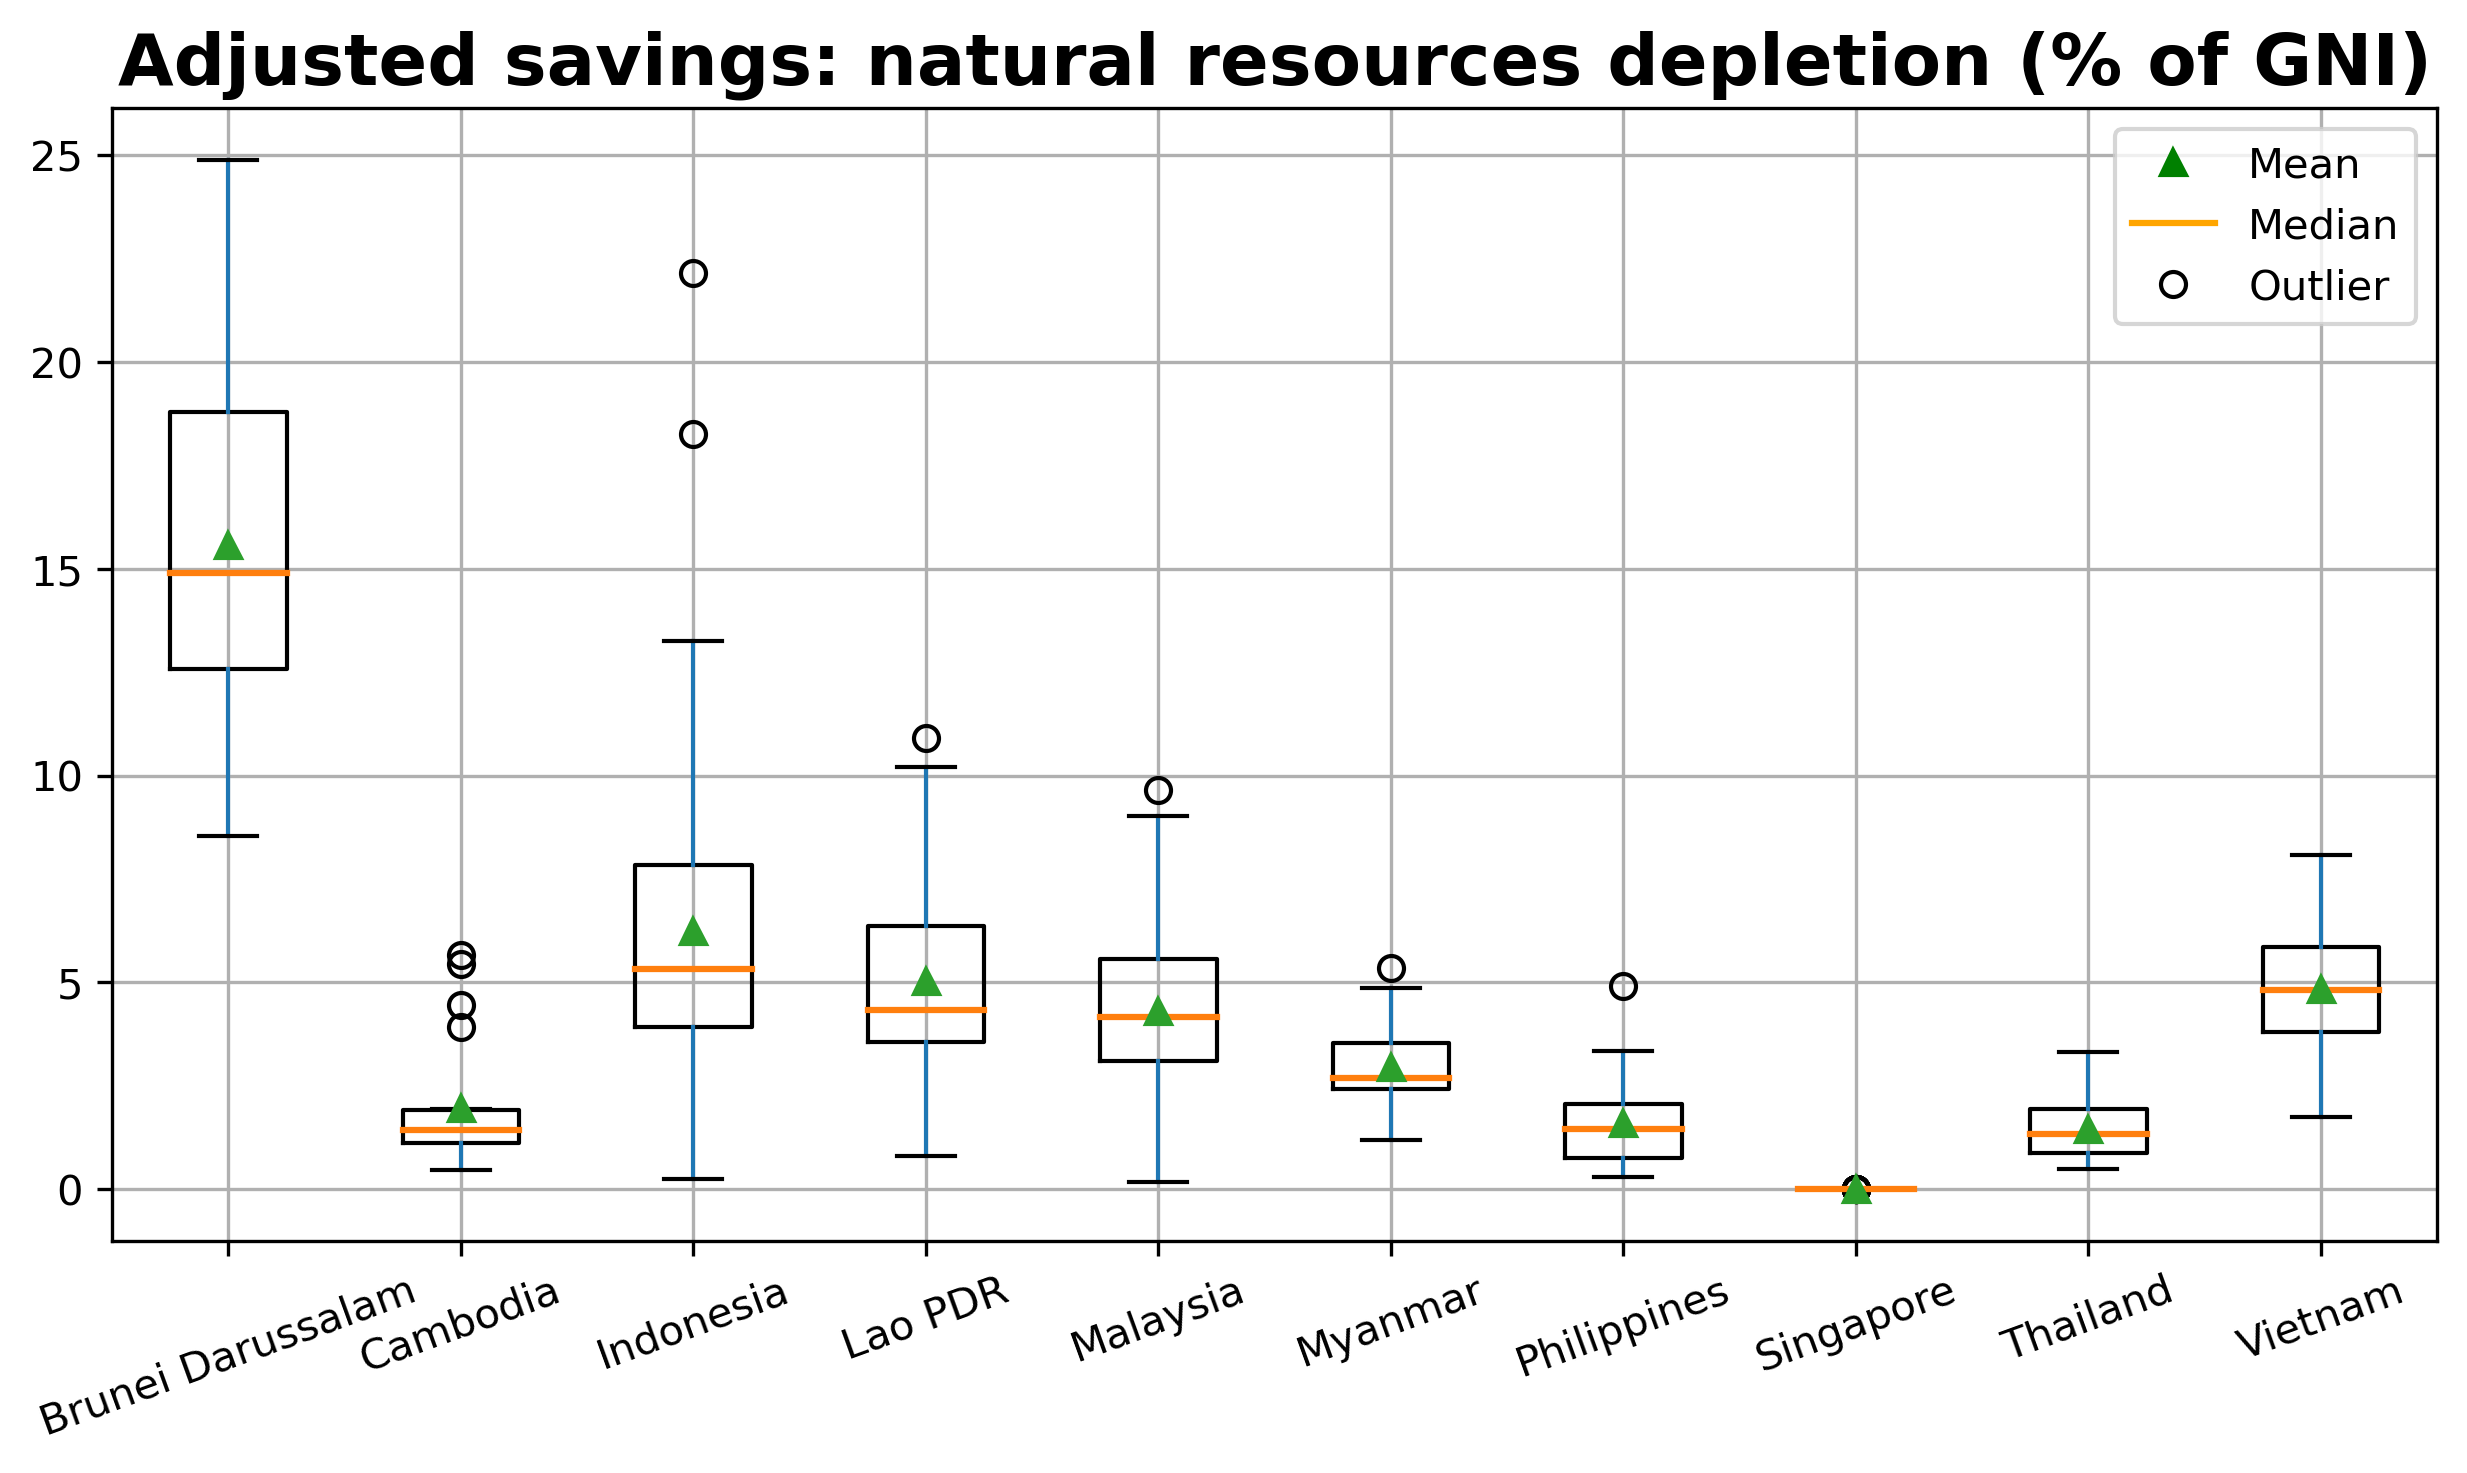

-----------------------------------------


-----------------------------------------
Descriptive Statistics and Boxplot for 'Voice and Accountability: Estimate' 


count      mean       std       min       25%       50%  \
Philippines         21.0  0.067571  0.137609 -0.138753 -0.027797  0.030184   
Singapore           21.0 -0.082507  0.168084 -0.387192 -0.183365 -0.098659   
Indonesia           21.0 -0.107171  0.328156 -1.024470 -0.255447 -0.011262   
Malaysia            21.0 -0.373594  0.152082 -0.563193 -0.492930 -0.416986   
Thailand            21.0 -0.378744  0.510428 -1.045118 -0.827271 -0.455884   
Brunei Darussalam   21.0 -0.784413  0.167863 -1.098655 -0.901009 -0.776592   
Cambodia            21.0 -0.967346  0.141491 -1.219561 -1.105392 -0.931646   
Vietnam             21.0 -1.402688  0.102325 -1.538451 -1.474383 -1.403045   
Lao PDR             21.0 -1.645094  0.173753 -1.801700 -1.739128 -1.709538   
Myanmar             21.0 -1.714552  0.517837 -2.233271 -2.122652 -1.918437   

                        75%       max  
Philippines        0.159266  0.419711  
Singapore          0.058619  0.139816  
Indonesia          0.131194  0.184858  
Malaysia          -0.339679 -0.043430  
Thailand           0.126583  0.467803  
Brunei Darussalam -0.650571 -0.505073  
Cambodia          -0.899963 -0.740300  
Vietnam           -1.366400 -1.087494  
Lao PDR           -1.649452 -1.132530  
Myanmar           -1.343992 -0.796773

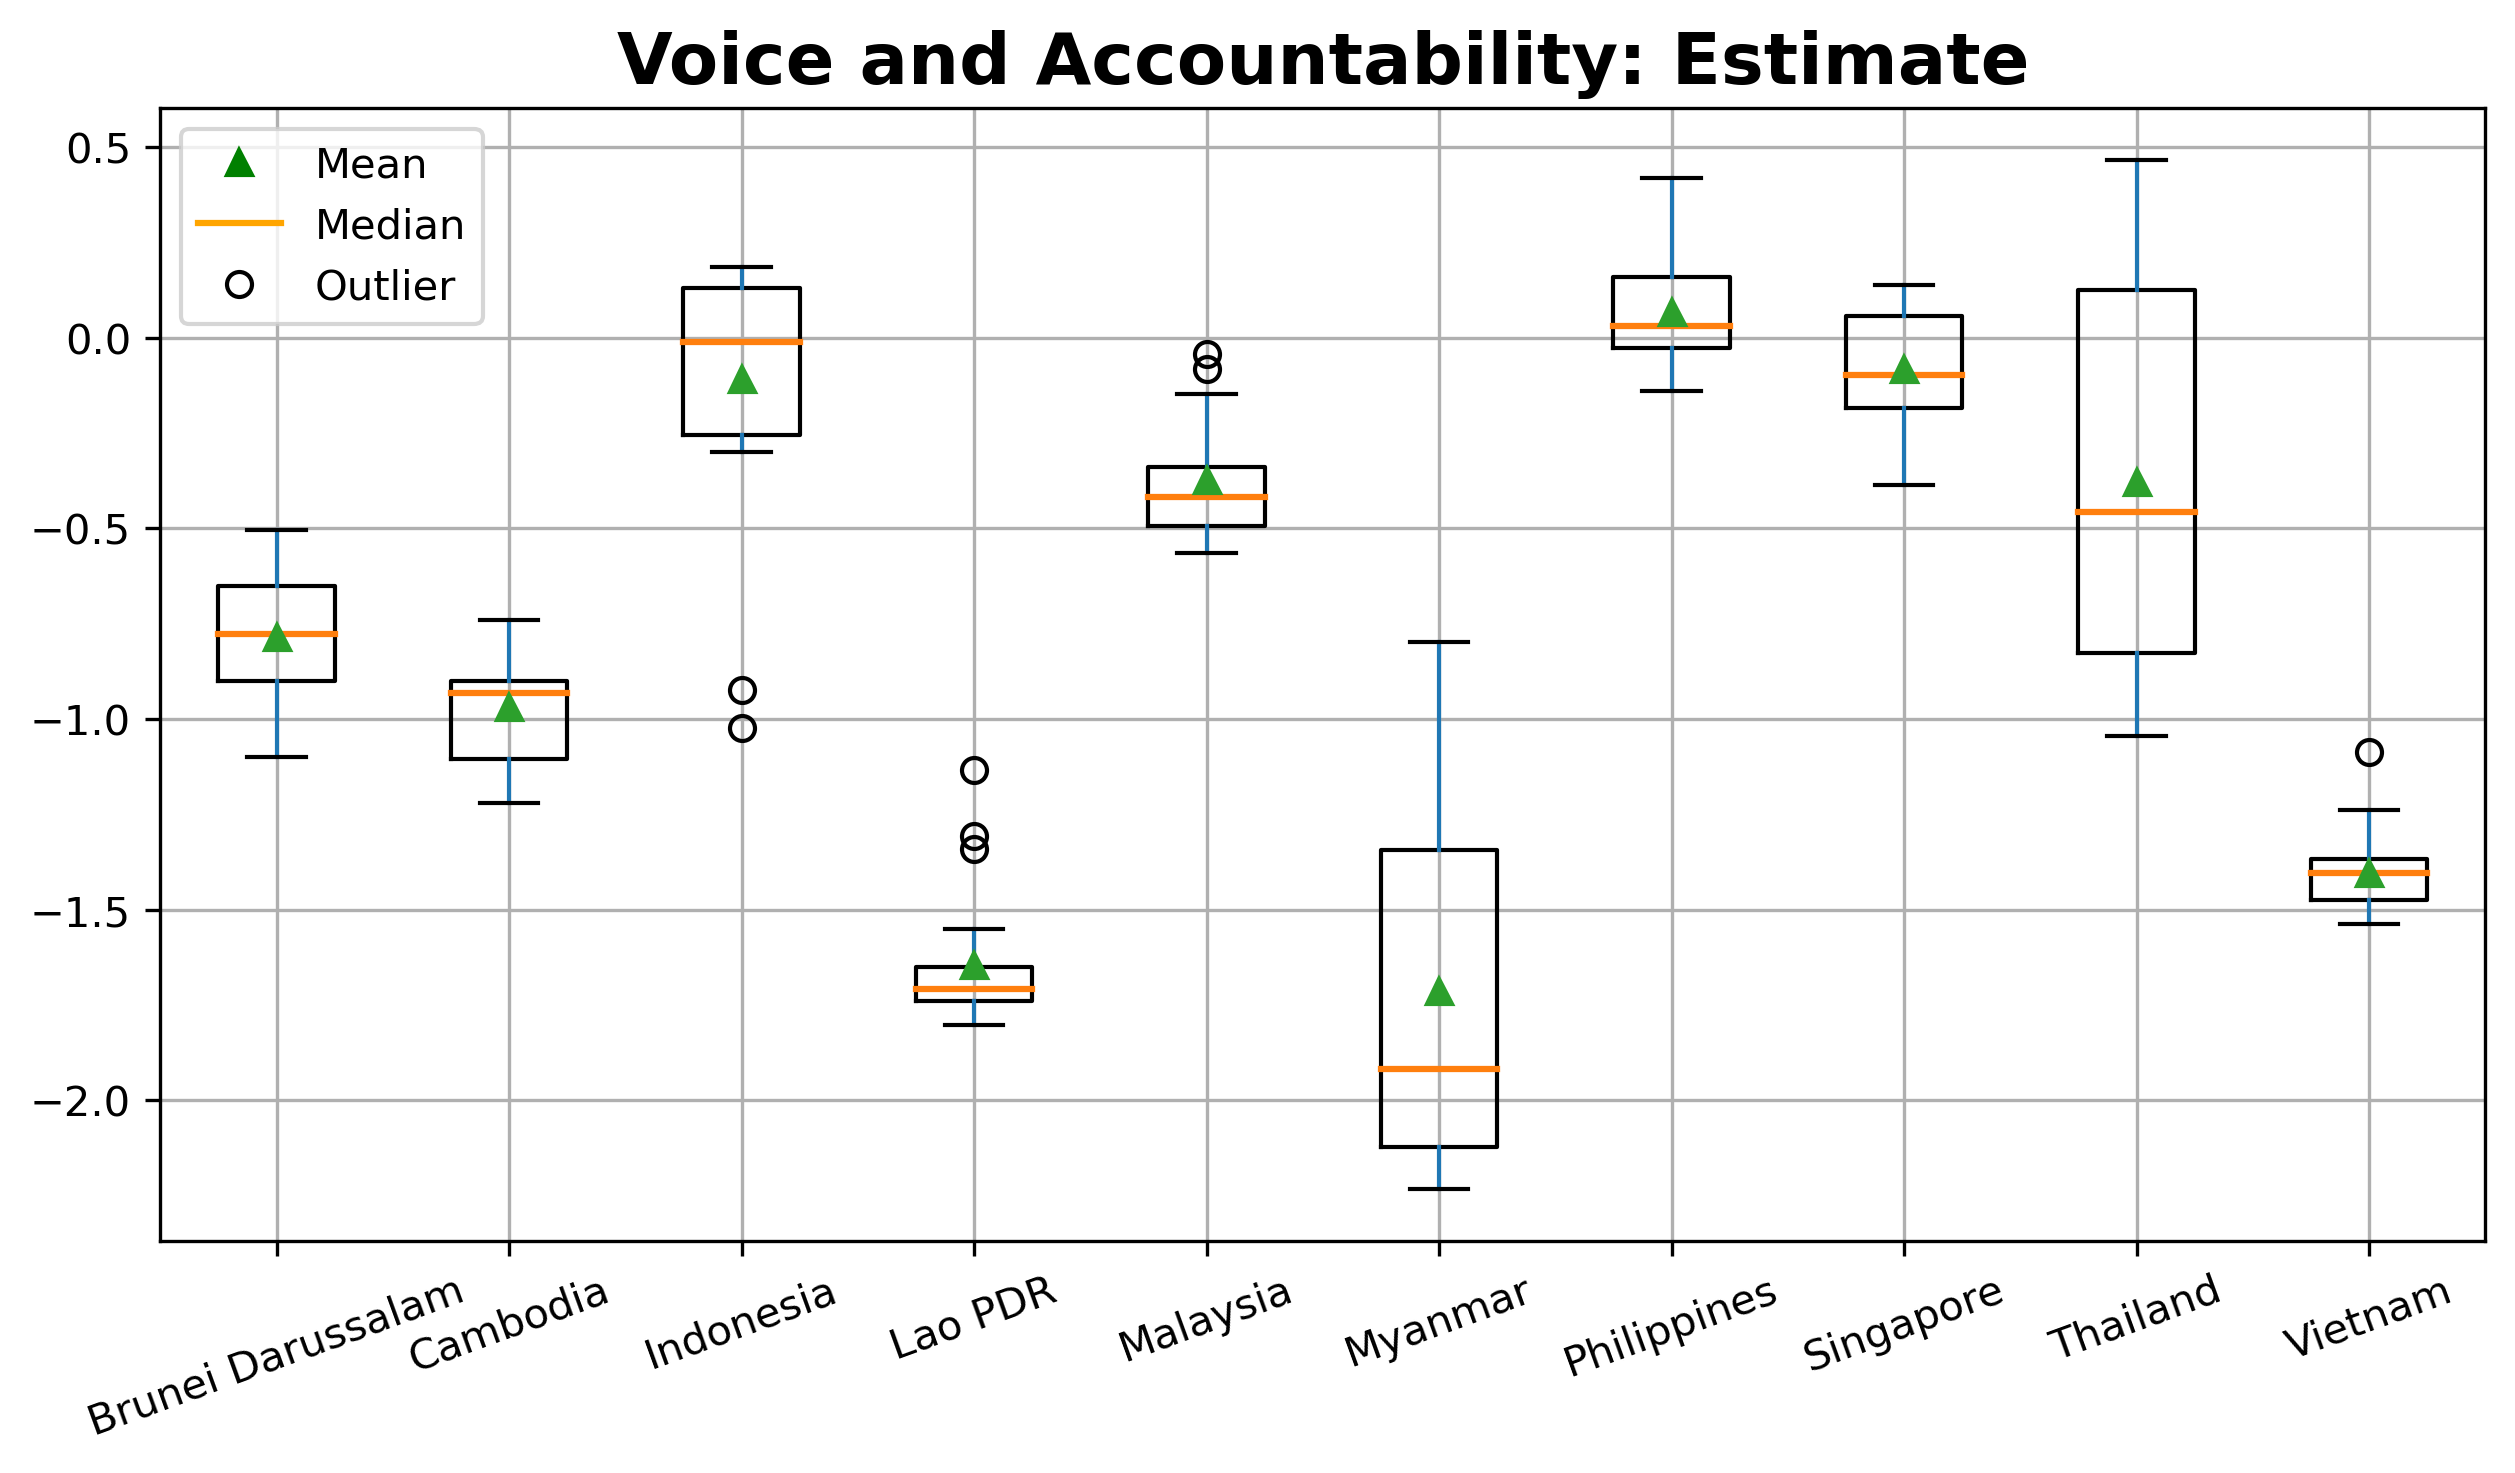

-----------------------------------------


-----------------------------------------
Descriptive Statistics and Boxplot for 'Government Effectiveness: Estimate' 


count      mean       std       min       25%       50%  \
Singapore           21.0  2.158882  0.142847  1.854913  2.088955  2.199069   
Malaysia            21.0  1.010003  0.165496  0.536283  0.948956  1.021576   
Brunei Darussalam   21.0  0.920303  0.223378  0.243172  0.873299  0.914678   
Thailand            21.0  0.293324  0.089866  0.091475  0.220506  0.315366   
Philippines         21.0 -0.017833  0.127091 -0.313254 -0.103113  0.001555   
Vietnam             21.0 -0.234334  0.187619 -0.580876 -0.382613 -0.247552   
Indonesia           21.0 -0.254277  0.231833 -0.705336 -0.414211 -0.272911   
Lao PDR             21.0 -0.773503  0.221791 -1.208072 -0.914389 -0.833849   
Cambodia            21.0 -0.825613  0.137479 -1.019837 -0.942989 -0.851850   
Myanmar             21.0 -1.348696  0.201490 -1.617900 -1.526451 -1.314760   

                        75%       max  
Singapore          2.231474  2.436975  
Malaysia           1.108519  1.267115  
Brunei Darussalam  1.059952  1.318309  
Thailand           0.357056  0.451717  
Philippines        0.073117  0.193027  
Vietnam           -0.070452  0.067400  
Indonesia         -0.198749  0.182741  
Lao PDR           -0.636936 -0.383220  
Cambodia          -0.699455 -0.568605  
Myanmar           -1.207594 -0.976280

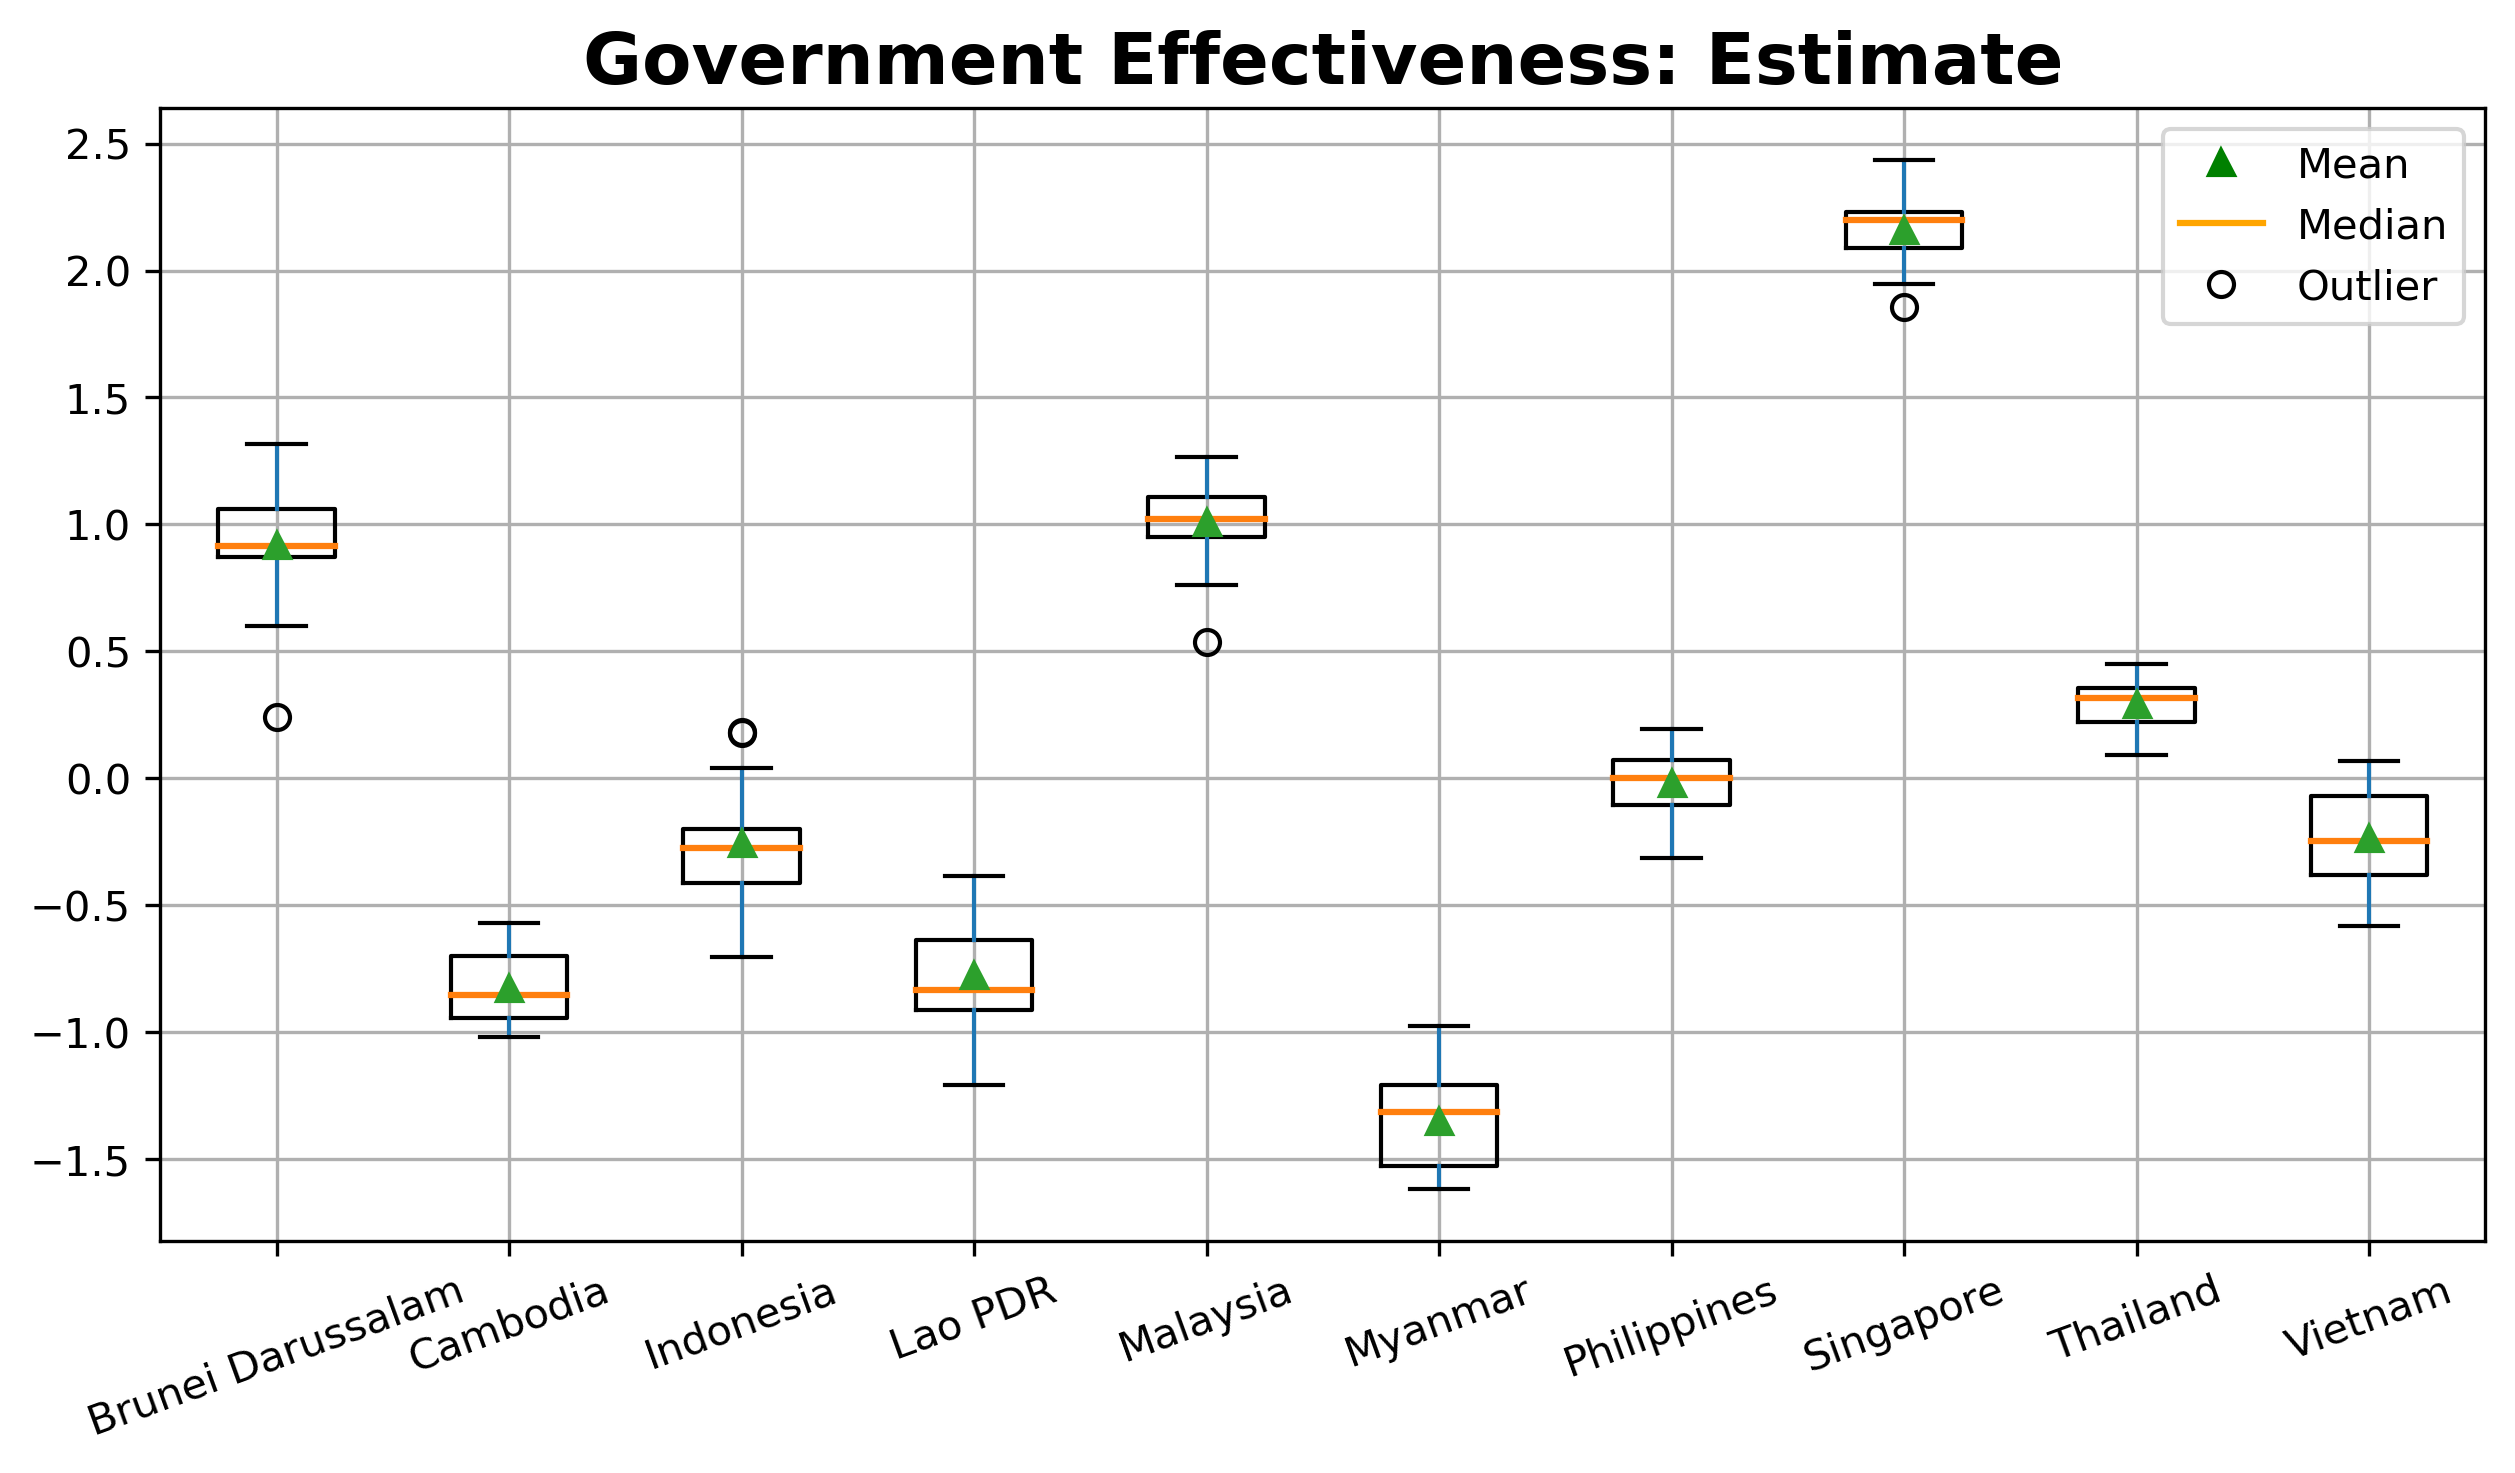

-----------------------------------------




In [20]:
for col in cols:
    print('-----------------------------------------')
    txt = "Descriptive Statistics and Boxplot for '" + col + "' "
    print(txt)
    gen_boxplot(esg_df_list, col)
    print('-----------------------------------------')
    print('\n')

        
1. **Adjusted savings: natural resources depletion (% of GNI)**

    > Philippines does not deplete its resouces too much. With regards to the extremes, Brunei is the most natural resource depleting ASEAN Nation, since they rely heavily in drilling Oil. 


2. **Voice and Accountability: Estimate**

    > Surprisingly, Philippine Citizens are the allowed the most participation when it comes to selecting its government and the citizen's freedom of speech. This is may be due to the fact that it is a democratic country, with people heaviliy influenced by western ideology. As compared to other ASEAN Nations that are comprised of Monarchies.

3. **Government Effectiveness: Estimate**

    > It was not a surprise that Singapore was the most effective, at least according to the data. Nonetheless, it was comforting to know that Philippines rank somewhere in the middle when it comes to effective governance among the ASEAN Region.

### Overall Government Response to the COVID-19 Pandemic

In [21]:
#generate a dataframe for the cumulative cases per thousand

#please do not mind the descriptive stats below
cumcase_df = gen_df(covid_df_list, 'Cumulative_cases')

count      mean       std  min       25%  \
Singapore                         364.0  5.815655  4.193384  0.0  0.176411   
Philippines                       364.0  1.320080  1.535238  0.0  0.023114   
Indonesia                         364.0  0.597594  0.750615  0.0  0.007039   
Malaysia                          364.0  0.521872  0.768824  0.0  0.093967   
Myanmar                           364.0  0.333142  0.632572  0.0  0.000348   
Brunei Darussalam                 364.0  0.256800  0.130026  0.0  0.301203   
Thailand                          364.0  0.038016  0.022117  0.0  0.027929   
Cambodia                          364.0  0.010324  0.006970  0.0  0.006512   
Viet Nam                          364.0  0.006159  0.005117  0.0  0.002350   
Lao People's Democratic Republic  364.0  0.002408  0.001596  0.0  0.001363   

                                       50%       75%       max  
Singapore                         7.523714  9.829995  9.965994  
Philippines                       0.350069  2.827955  4.279030  
Indonesia                         0.212871  1.046701  2.671242  
Malaysia                          0.265019  0.346213  3.388373  
Myanmar                           0.005566  0.249461  2.265477  
Brunei Darussalam                 0.320526  0.331892  0.356898  
Thailand                          0.045486  0.051080  0.095708  
Cambodia                          0.008366  0.016450  0.021716  
Viet Nam                          0.003647  0.011249  0.014958  
Lao People's Democratic Republic  0.002590  0.003135  0.005588

In [22]:
#Get the latest count (December 31, 2020) of the Cumulative COVID-19 Case per thousands for each country 

print('COVID-19 Cases per Thousands on December 31, 2020')
print('---------------------------------------------------------------')
latest_count = cumcase_df.iloc[-1, :].sort_values(ascending = False)
print(latest_count)
print('---------------------------------------------------------------')

COVID-19 Cases per Thousands on December 31, 2020
---------------------------------------------------------------
Singapore                           9.965994
Philippines                         4.279030
Malaysia                            3.388373
Indonesia                           2.671242
Myanmar                             2.265477
Brunei Darussalam                   0.356898
Thailand                            0.095708
Cambodia                            0.021716
Viet Nam                            0.014958
Lao People's Democratic Republic    0.005588
Name: 2020-12-31 00:00:00, dtype: float64
---------------------------------------------------------------


**Actual Visualizations**

The visualizations from hereon come in three. The differences in these are the y-limits of each axes. The arrangements of these visualizations follow 3 cases and are stated as follows

**<i>Case 1</i>**:
Uniform Y-Limits for **BOTH** Cumulative COVID-19 Cases per Thousands and Overall Government Response

**<i>Case 2</i>**:
Uniform Y-Limits for **ONLY** Overall Government Response

**<i>Case 3</i>**:
Default Y-Limits for both; these were the default scales from <code>matplotlib</code>


The first step was to 'sync' the arrangement of countries of the COVID Dataset list and the Government Response list, since, as stated before, the notebook heavily relies on list comprehension.

In [23]:
govres_df_nlist = [govres_df_list[0], govres_df_list[2], govres_df_list[1], 
                  govres_df_list[3], govres_df_list[5], govres_df_list[4],
                  govres_df_list[6], govres_df_list[7], govres_df_list[8],
                  govres_df_list[9]]

#### Cumulative Cases per Thousands

##### **<i>Case 1</i>**:
Uniform Y-Limits for **BOTH** Cumulative COVID-19 Cases per Thousands and Overall Government Response

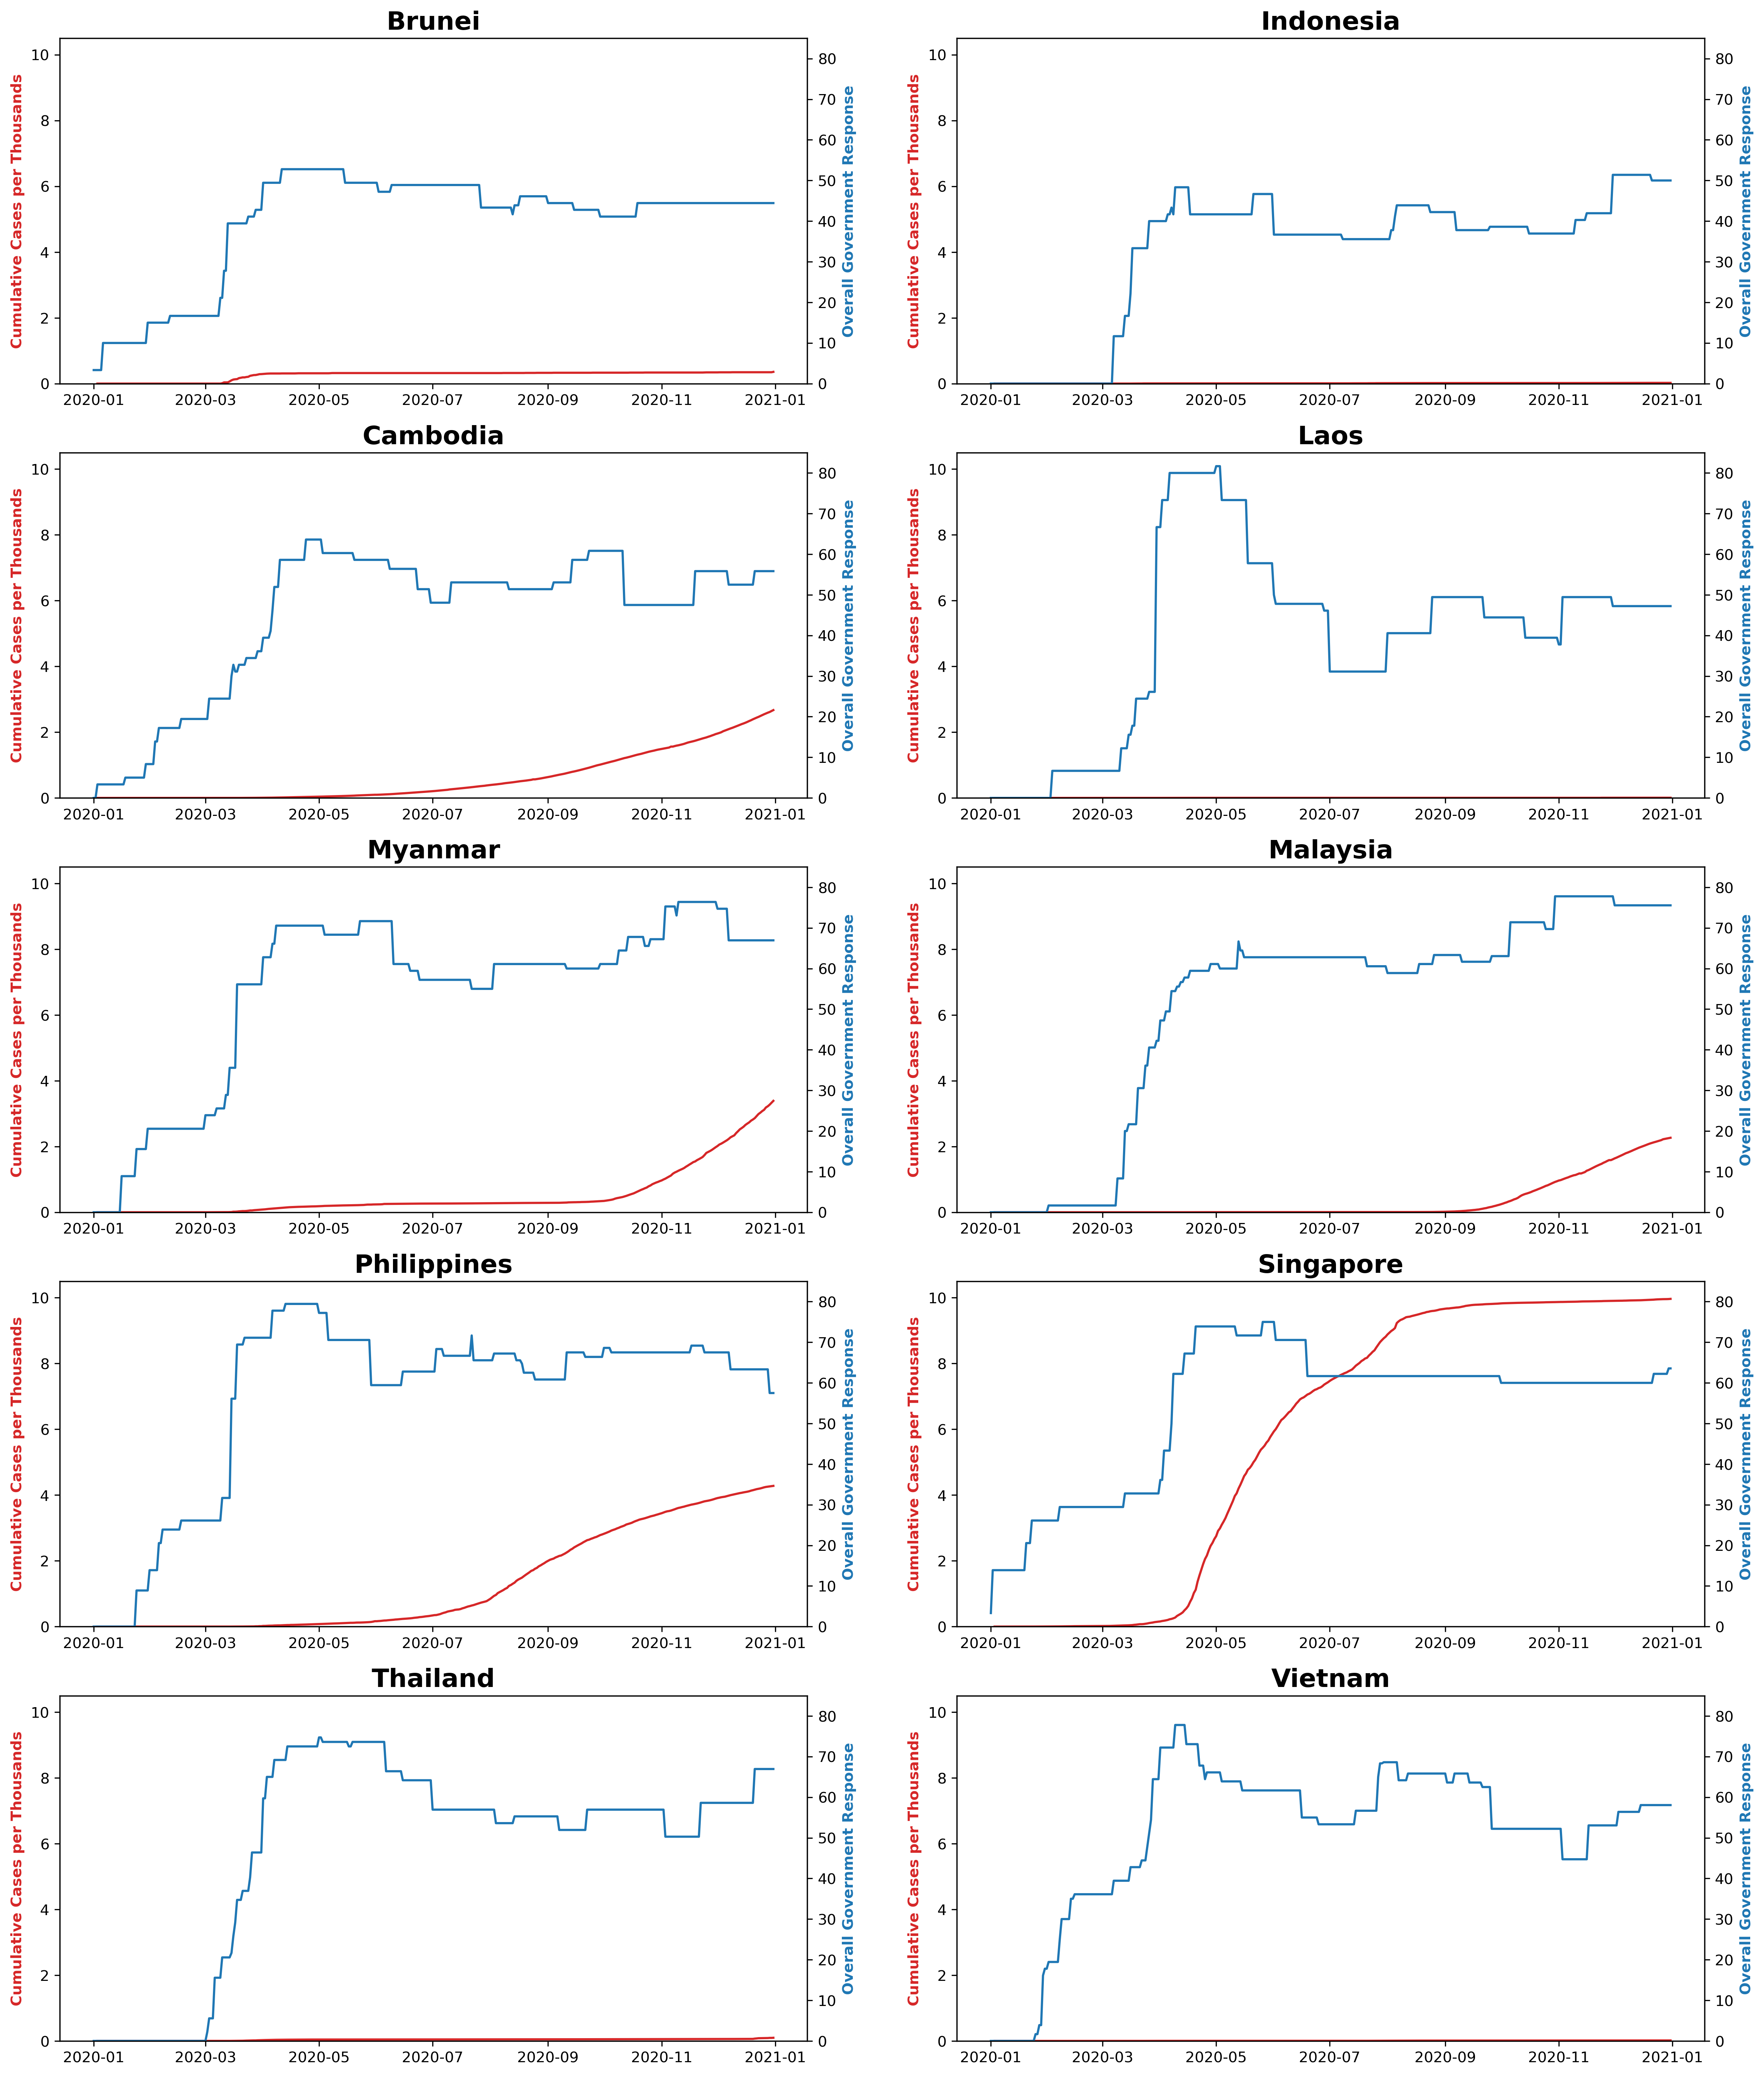

In [24]:
fig = plt.figure(figsize = (20, 25), dpi=300)
i = 0

t_wt = 'bold'
lab_wt = 'semibold'

t_size = 'xx-large'
lab_size = 'large'

row = 5
col = 2
while i < len(covid_df_list):
    ax1 = plt.subplot(row, col, i+1)
    ax1.plot(covid_df_list[i]['Cumulative_cases'], label = 'Cumulative Cases per Thousands',
            color = 'tab:red')
    ax1.set_ylabel('Cumulative Cases per Thousands', color = 'tab:red',
                   fontweight = lab_wt)
    
    ax2 = ax1.twinx()
    ax2.plot(govres_df_nlist[i], label = 'Government Response Score',
            color = 'tab:blue')
    ax2.set_ylabel('Overall Government Response', color='tab:blue',
                   fontweight = lab_wt)
    ax2.set_title(govres_df_list[i].name, fontsize = t_size, fontweight = t_wt)
    
    ax2.set_ylim(bottom = 0, top = 85)
    ax1.set_ylim(bottom = 0, top = 10.5)
    
    i += 1

plt.show()

##### **<i>Case 2</i>**:
Uniform Y-Limits for **ONLY** Overall Government Response

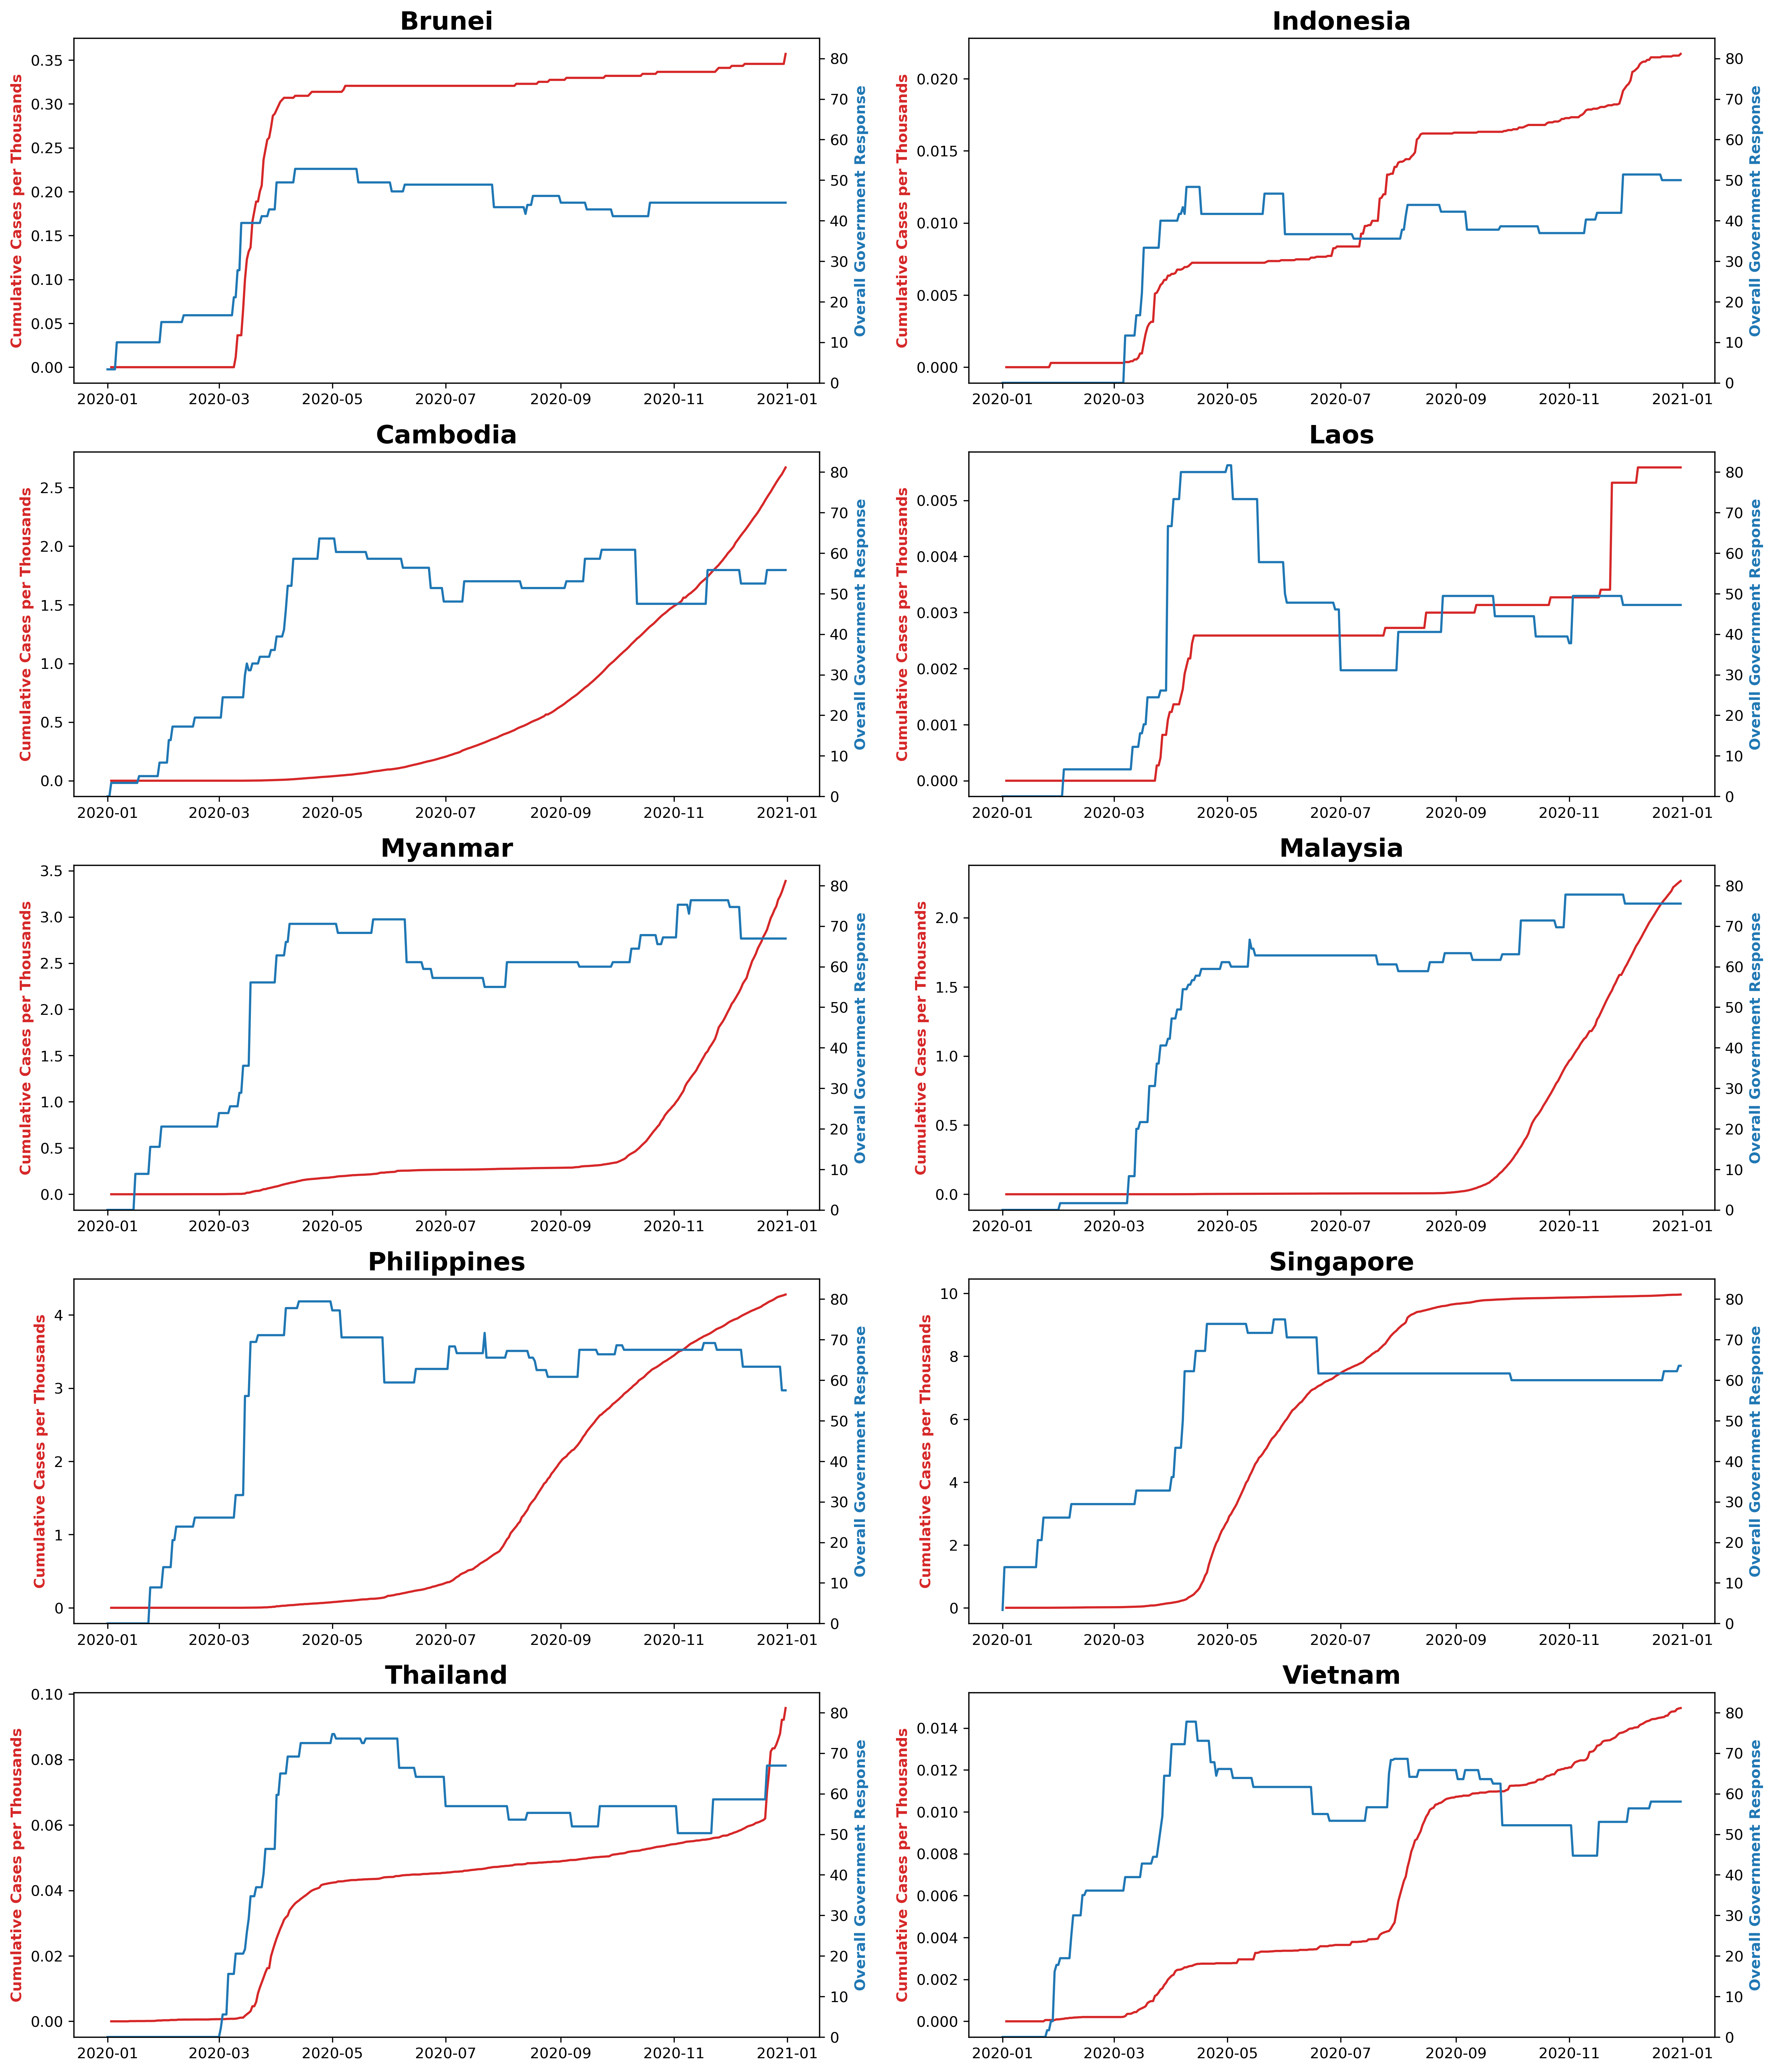

In [25]:
fig = plt.figure(figsize = (20, 25), dpi=300)
i = 0

t_wt = 'bold'
lab_wt = 'semibold'

t_size = 'xx-large'
lab_size = 'large'

row = 5
col = 2
while i < len(covid_df_list):
    ax1 = plt.subplot(row, col, i+1)
    ax1.plot(covid_df_list[i]['Cumulative_cases'], label = 'Cumulative Cases per Thousands',
            color = 'tab:red')
    ax1.set_ylabel('Cumulative Cases per Thousands', color = 'tab:red',
                   fontweight = lab_wt)
    
    ax2 = ax1.twinx()
    ax2.plot(govres_df_nlist[i], label = 'Government Response Score',
            color = 'tab:blue')
    ax2.set_ylabel('Overall Government Response', color='tab:blue',
                   fontweight = lab_wt)
    ax2.set_title(govres_df_list[i].name, fontsize = t_size, fontweight = t_wt)
    
    ax2.set_ylim(bottom = 0, top = 85)
    
    i += 1

plt.show()

##### **<i>Case 3</i>**:
Default Y-Limits for both; these were the default scales from <code>matplotlib</code>

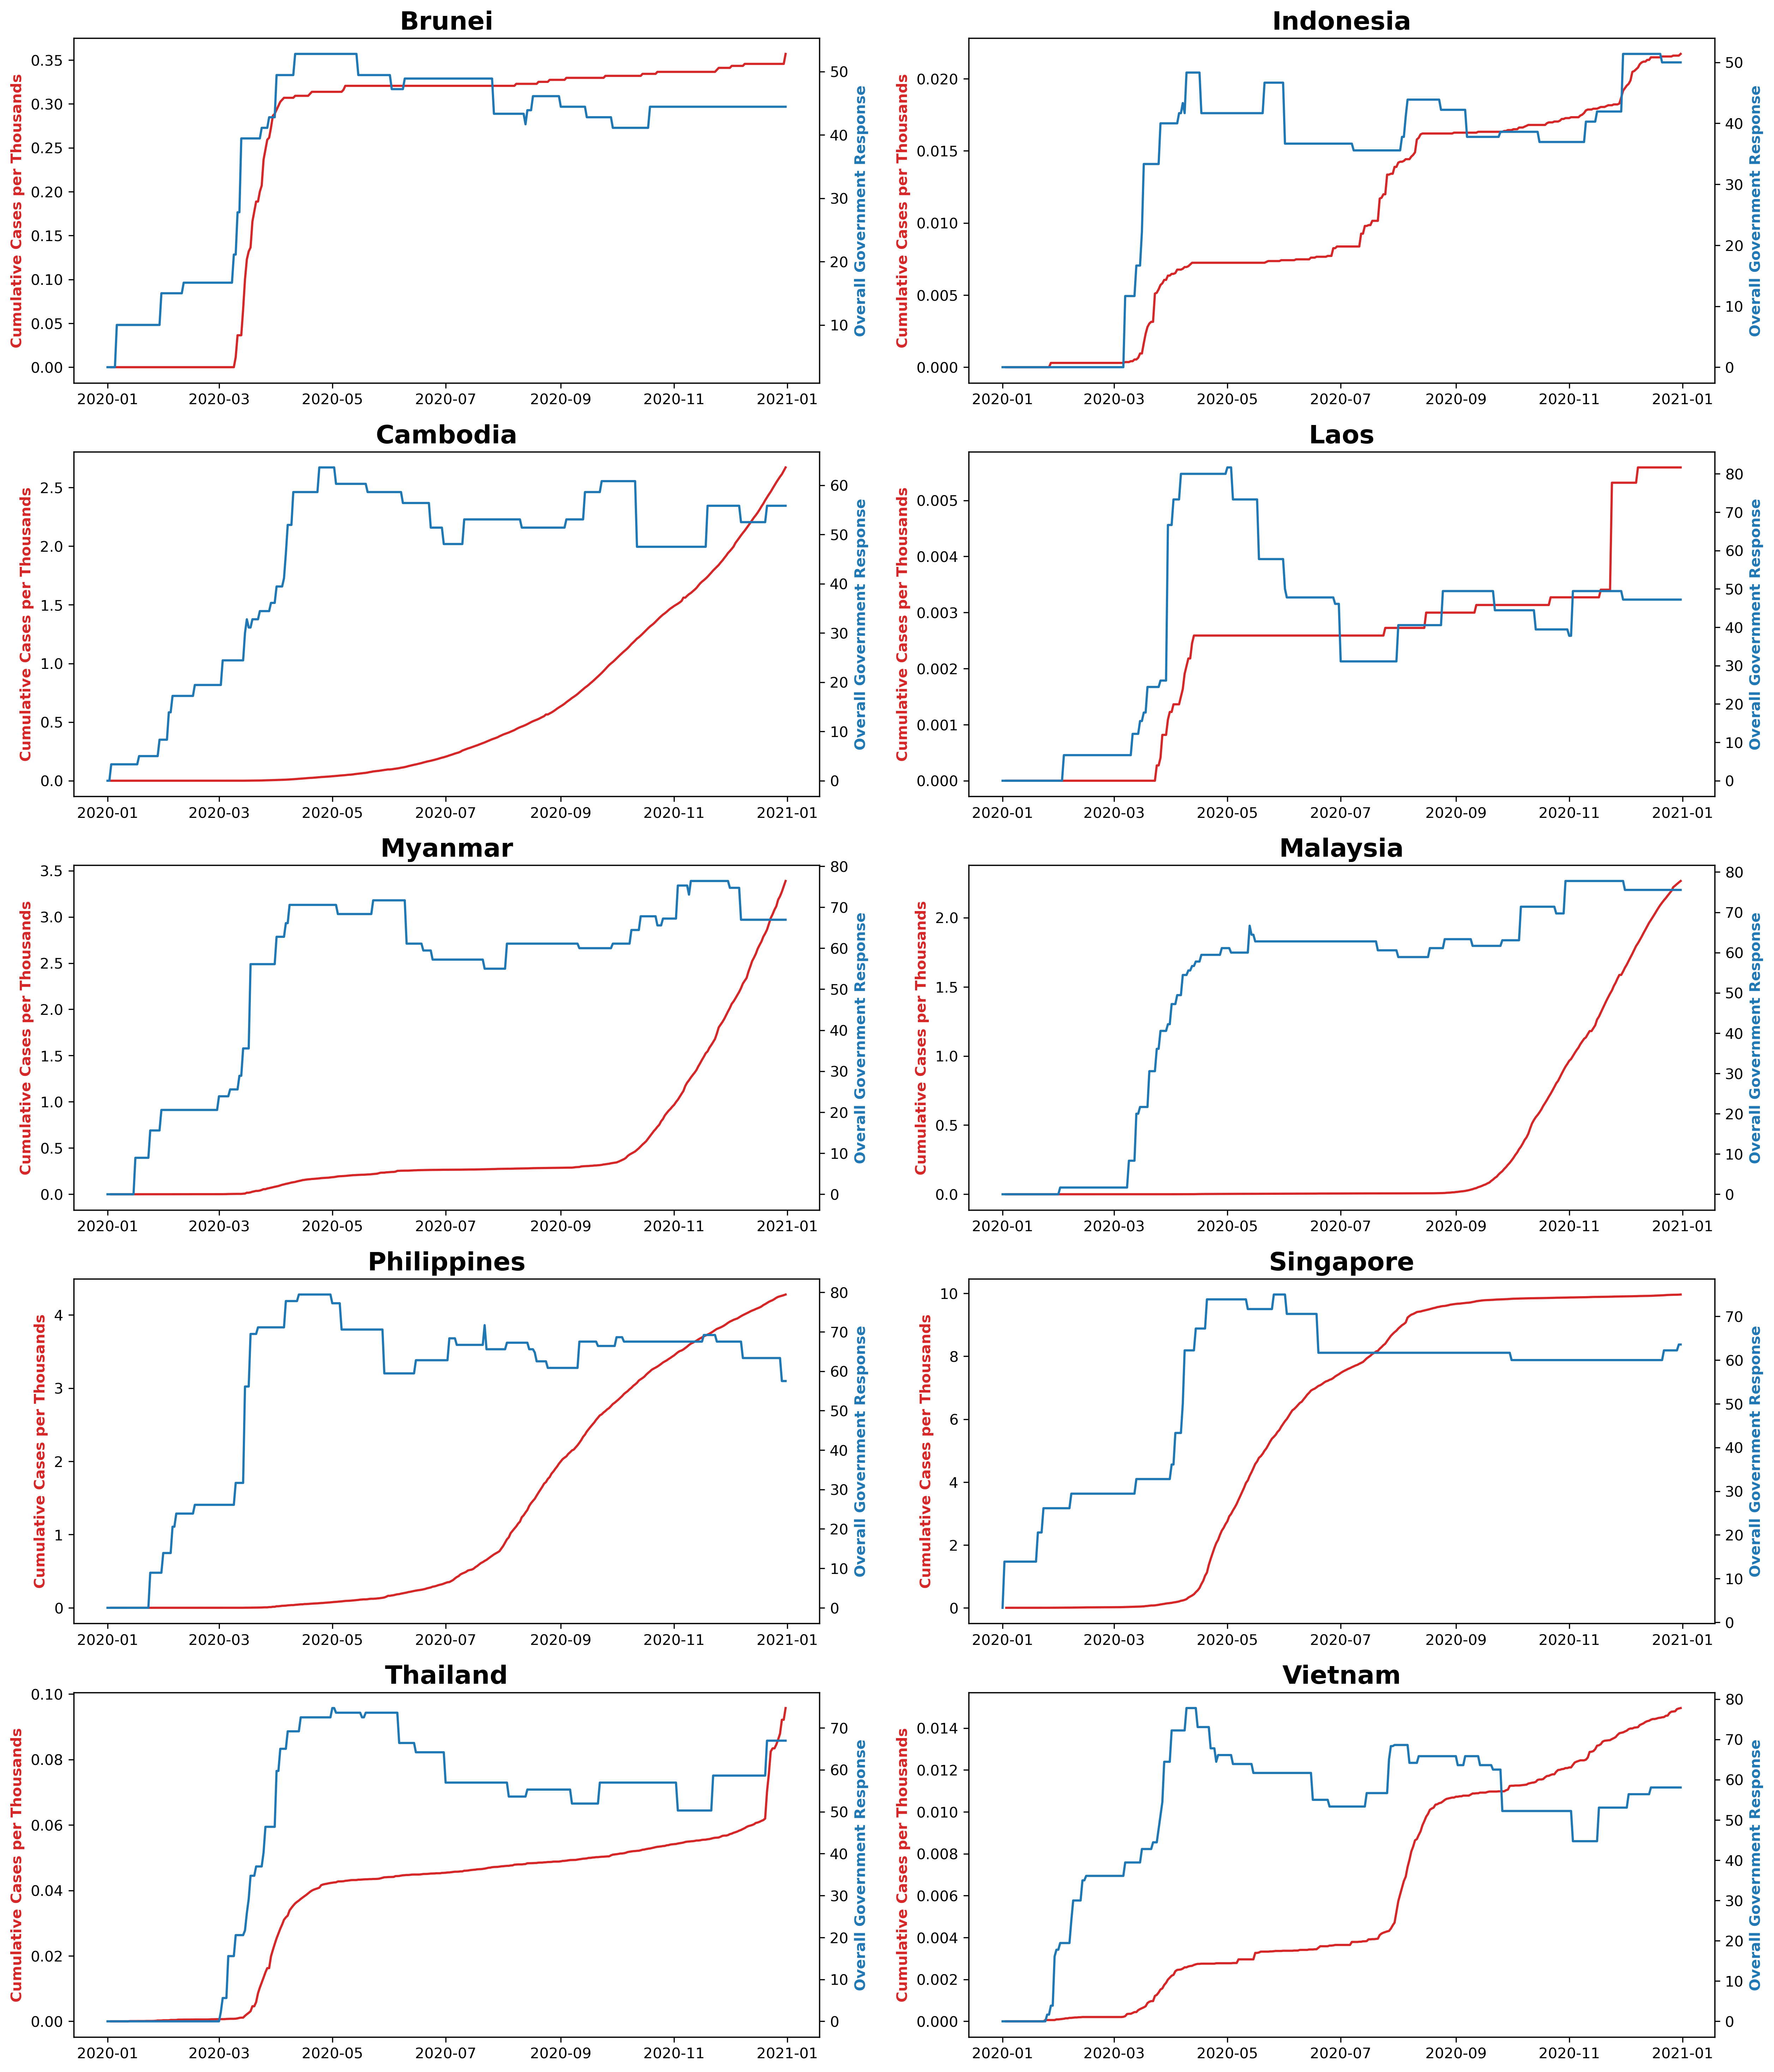

In [26]:
fig = plt.figure(figsize = (20, 25), dpi=300)
i = 0

t_wt = 'bold'
lab_wt = 'semibold'

t_size = 'xx-large'
lab_size = 'large'

row = 5
col = 2
while i < len(covid_df_list):
    ax1 = plt.subplot(row, col, i+1)
    ax1.plot(covid_df_list[i]['Cumulative_cases'], label = 'Cumulative Cases per Thousands',
            color = 'tab:red')
    ax1.set_ylabel('Cumulative Cases per Thousands', color = 'tab:red',
                   fontweight = lab_wt)
    
    ax2 = ax1.twinx()
    ax2.plot(govres_df_nlist[i], label = 'Government Response Score',
            color = 'tab:blue')
    ax2.set_ylabel('Overall Government Response', color='tab:blue',
                   fontweight = lab_wt)
    ax2.set_title(govres_df_list[i].name, fontsize = t_size, fontweight = t_wt)
    
    i += 1

plt.show()

With regards to the initial response to the COVID-19 Pandemic, it can be observed in the plots above that all countries responded **immediately** after COVID-19 cases were detected in their nations, as illustrated by the sudden spikes in the response scores in the early months.

With regards to effectivity however, with respect to the total cases per thousands, the Philippines come second to the last. Singapore has it the worst. **This may be a product of the large population density in Singapore and the Philippines** despite other countries having more raw COVID-19 cases.

#### Daily Cases per Thousands

The visualizations and statistics that follow are not necessarily needed. This is because our study group is initially following Oxford's method of super-imposing the government response scores to cumulative cases. The line plots below serve only its purpose for additional insights, but the graphs below give insight nonetheless.

In [27]:
print('Descriptive Statistics for Daily Cases per Thousands')
print('-------------------------------------------------------------------------------------------------')
dailycase_df = gen_df(covid_df_list, 'New_cases')
print('-------------------------------------------------------------------------------------------------')

Descriptive Statistics for Daily Cases per Thousands
-------------------------------------------------------------------------------------------------


count      mean       std  min       25%  \
Singapore                         364.0  0.027379  0.041937  0.0  0.001021   
Philippines                       364.0  0.011756  0.012495  0.0  0.000681   
Malaysia                          364.0  0.009309  0.015799  0.0  0.000184   
Indonesia                         364.0  0.007339  0.007725  0.0  0.000523   
Myanmar                           364.0  0.006224  0.010083  0.0  0.000000   
Brunei Darussalam                 364.0  0.000980  0.004108  0.0  0.000000   
Thailand                          364.0  0.000263  0.000784  0.0  0.000014   
Cambodia                          364.0  0.000060  0.000187  0.0  0.000000   
Viet Nam                          364.0  0.000041  0.000077  0.0  0.000000   
Lao People's Democratic Republic  364.0  0.000015  0.000110  0.0  0.000000   

                                       50%       75%       max  
Singapore                         0.004594  0.040030  0.242646  
Philippines                       0.008680  0.018600  0.060898  
Malaysia                          0.001135  0.008595  0.071610  
Indonesia                         0.004633  0.013566  0.030411  
Myanmar                           0.000037  0.012294  0.041377  
Brunei Darussalam                 0.000000  0.000000  0.034099  
Thailand                          0.000072  0.000143  0.008240  
Cambodia                          0.000000  0.000059  0.001958  
Viet Nam                          0.000010  0.000041  0.000514  
Lao People's Democratic Republic  0.000000  0.000000  0.001908

-------------------------------------------------------------------------------------------------


**Actual Visualizations**

##### **<i>Case 1</i>**:
Uniform Y-Limits for **BOTH** Daily COVID-19 Cases per Thousands and Overall Government Response

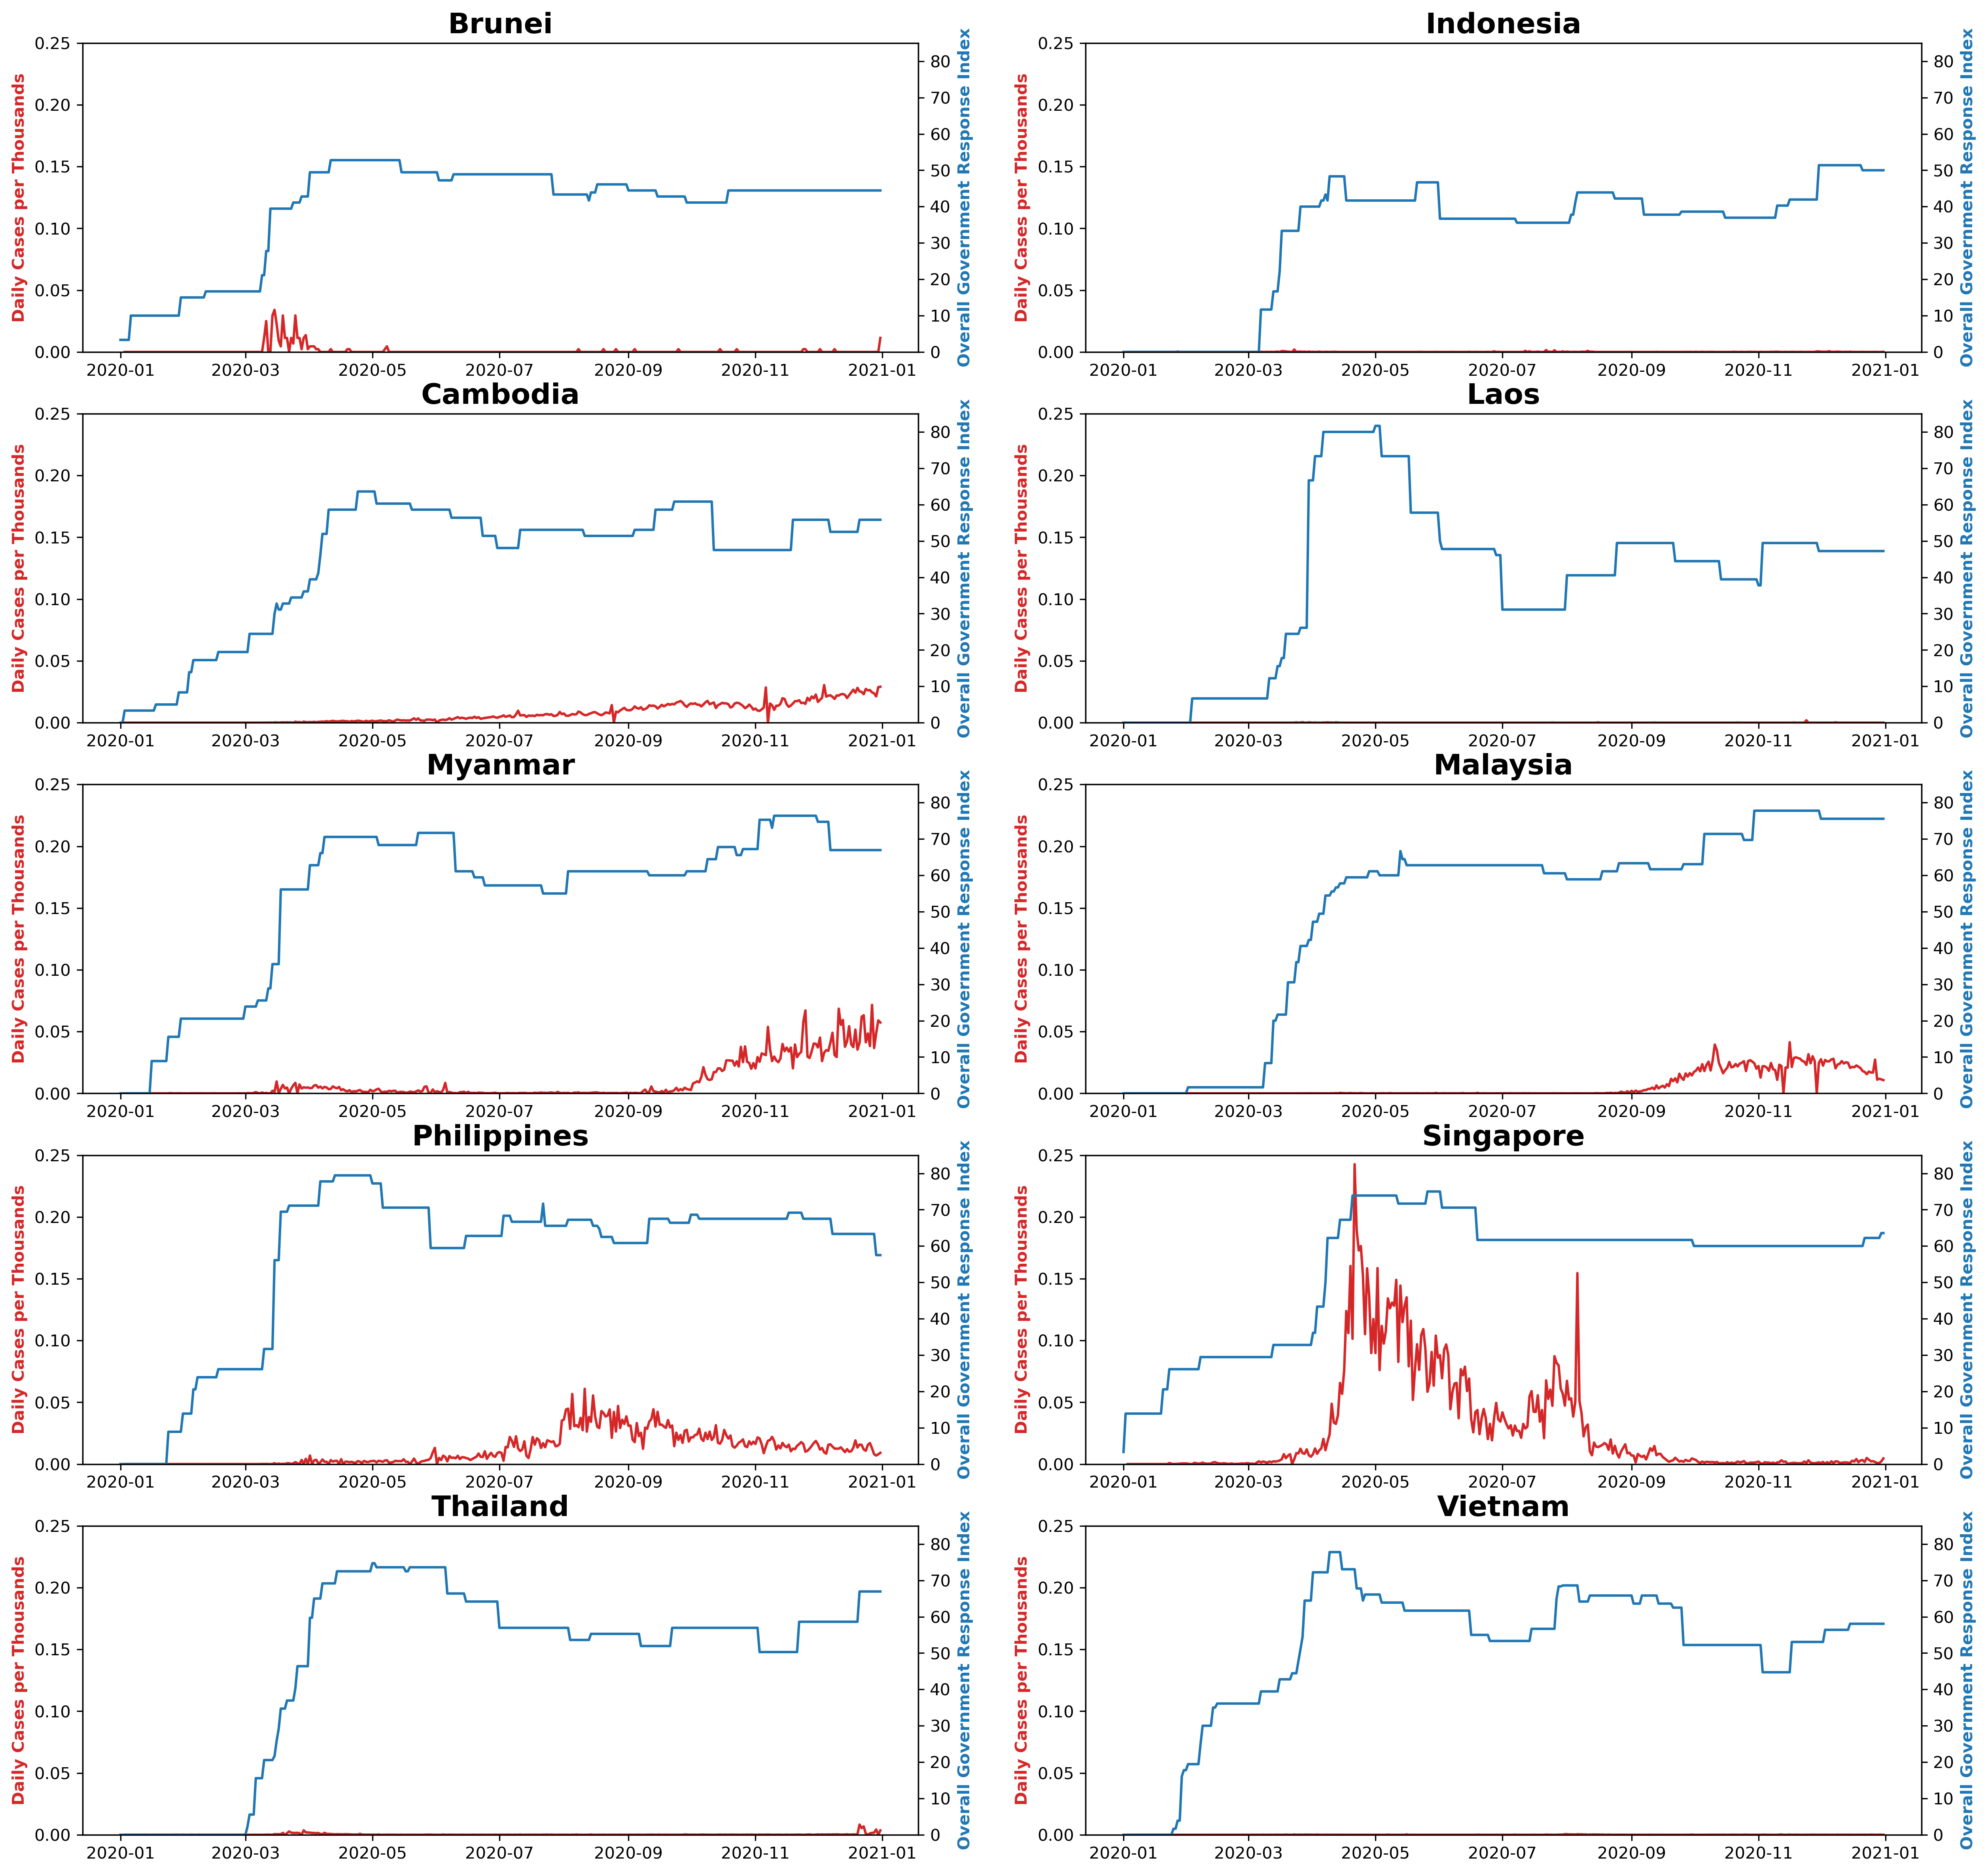

In [28]:
fig = plt.figure(figsize = (20, 20), dpi=300)
i = 0

t_wt = 'bold'
lab_wt = 'semibold'

t_size = 'xx-large'
lab_size = 'large'

row = 5
col = 2
while i < len(covid_df_list):
    ax1 = plt.subplot(row, col, i+1)
    ax1.plot(covid_df_list[i]['New_cases'], label = 'Cumulative Cases per Thousands',
            color = 'tab:red')
    ax1.set_ylabel('Daily Cases per Thousands', color = 'tab:red',
                  fontweight = lab_wt)
    
    ax2 = ax1.twinx()
    ax2.plot(govres_df_nlist[i], label = 'Government Response Score',
            color = 'tab:blue')
    ax2.set_ylabel('Overall Government Response Index', color='tab:blue',
                  fontweight = lab_wt)
    ax2.set_title(govres_df_list[i].name, fontsize = t_size, fontweight = t_wt)
    
    ax2.set_ylim(bottom = 0, top = 85)
    ax1.set_ylim(bottom = 0, top = 0.25)
    
    i += 1

plt.show()

##### **<i>Case 2</i>**:
Uniform Y-Limits for **ONLY** Overall Government Response

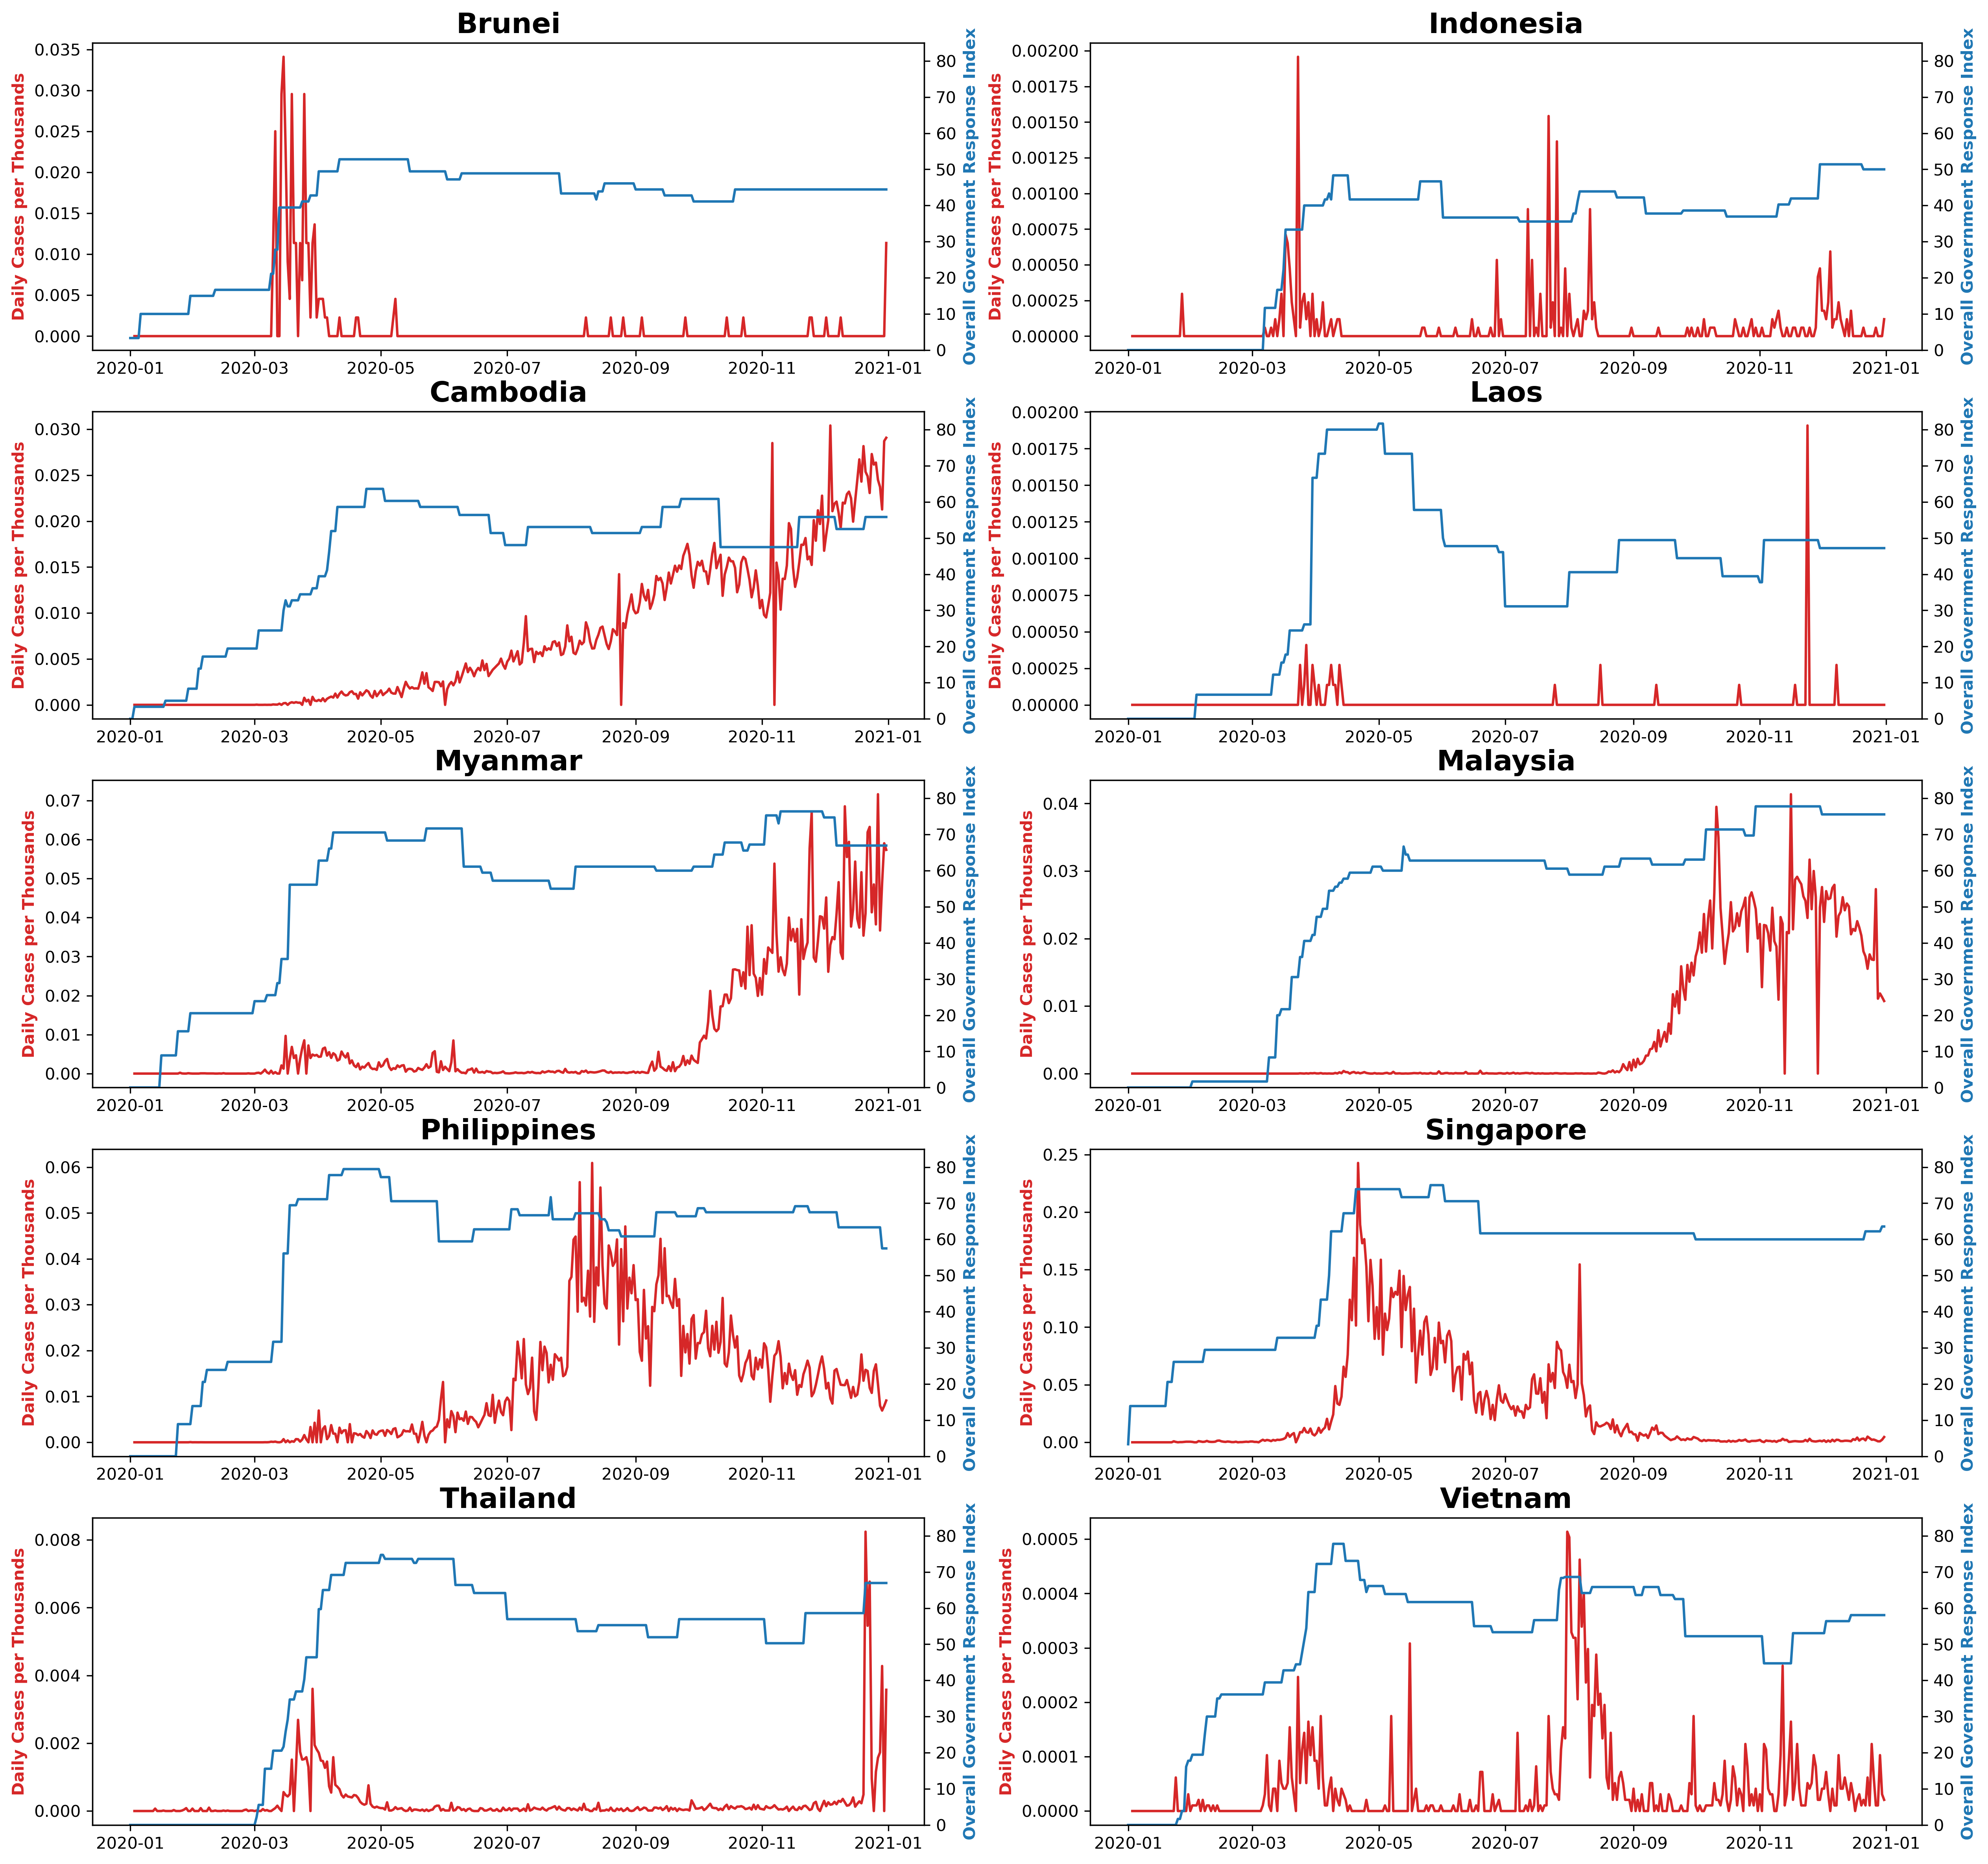

In [29]:
fig = plt.figure(figsize = (20, 20), dpi=300)
i = 0

t_wt = 'bold'
lab_wt = 'semibold'

t_size = 'xx-large'
lab_size = 'large'

row = 5
col = 2
while i < len(covid_df_list):
    ax1 = plt.subplot(row, col, i+1)
    ax1.plot(covid_df_list[i]['New_cases'], label = 'Cumulative Cases per Thousands',
            color = 'tab:red')
    ax1.set_ylabel('Daily Cases per Thousands', color = 'tab:red',
                  fontweight = lab_wt)
    
    ax2 = ax1.twinx()
    ax2.plot(govres_df_nlist[i], label = 'Government Response Score',
            color = 'tab:blue')
    ax2.set_ylabel('Overall Government Response Index', color='tab:blue',
                  fontweight = lab_wt)
    ax2.set_title(govres_df_list[i].name, fontsize = t_size, fontweight = t_wt)
    
    ax2.set_ylim(bottom = 0, top = 85)
    
    i += 1

plt.show()

##### **<i>Case 3</i>**:
Default Y-Limits for both; these were the default scales from <code>matplotlib</code>

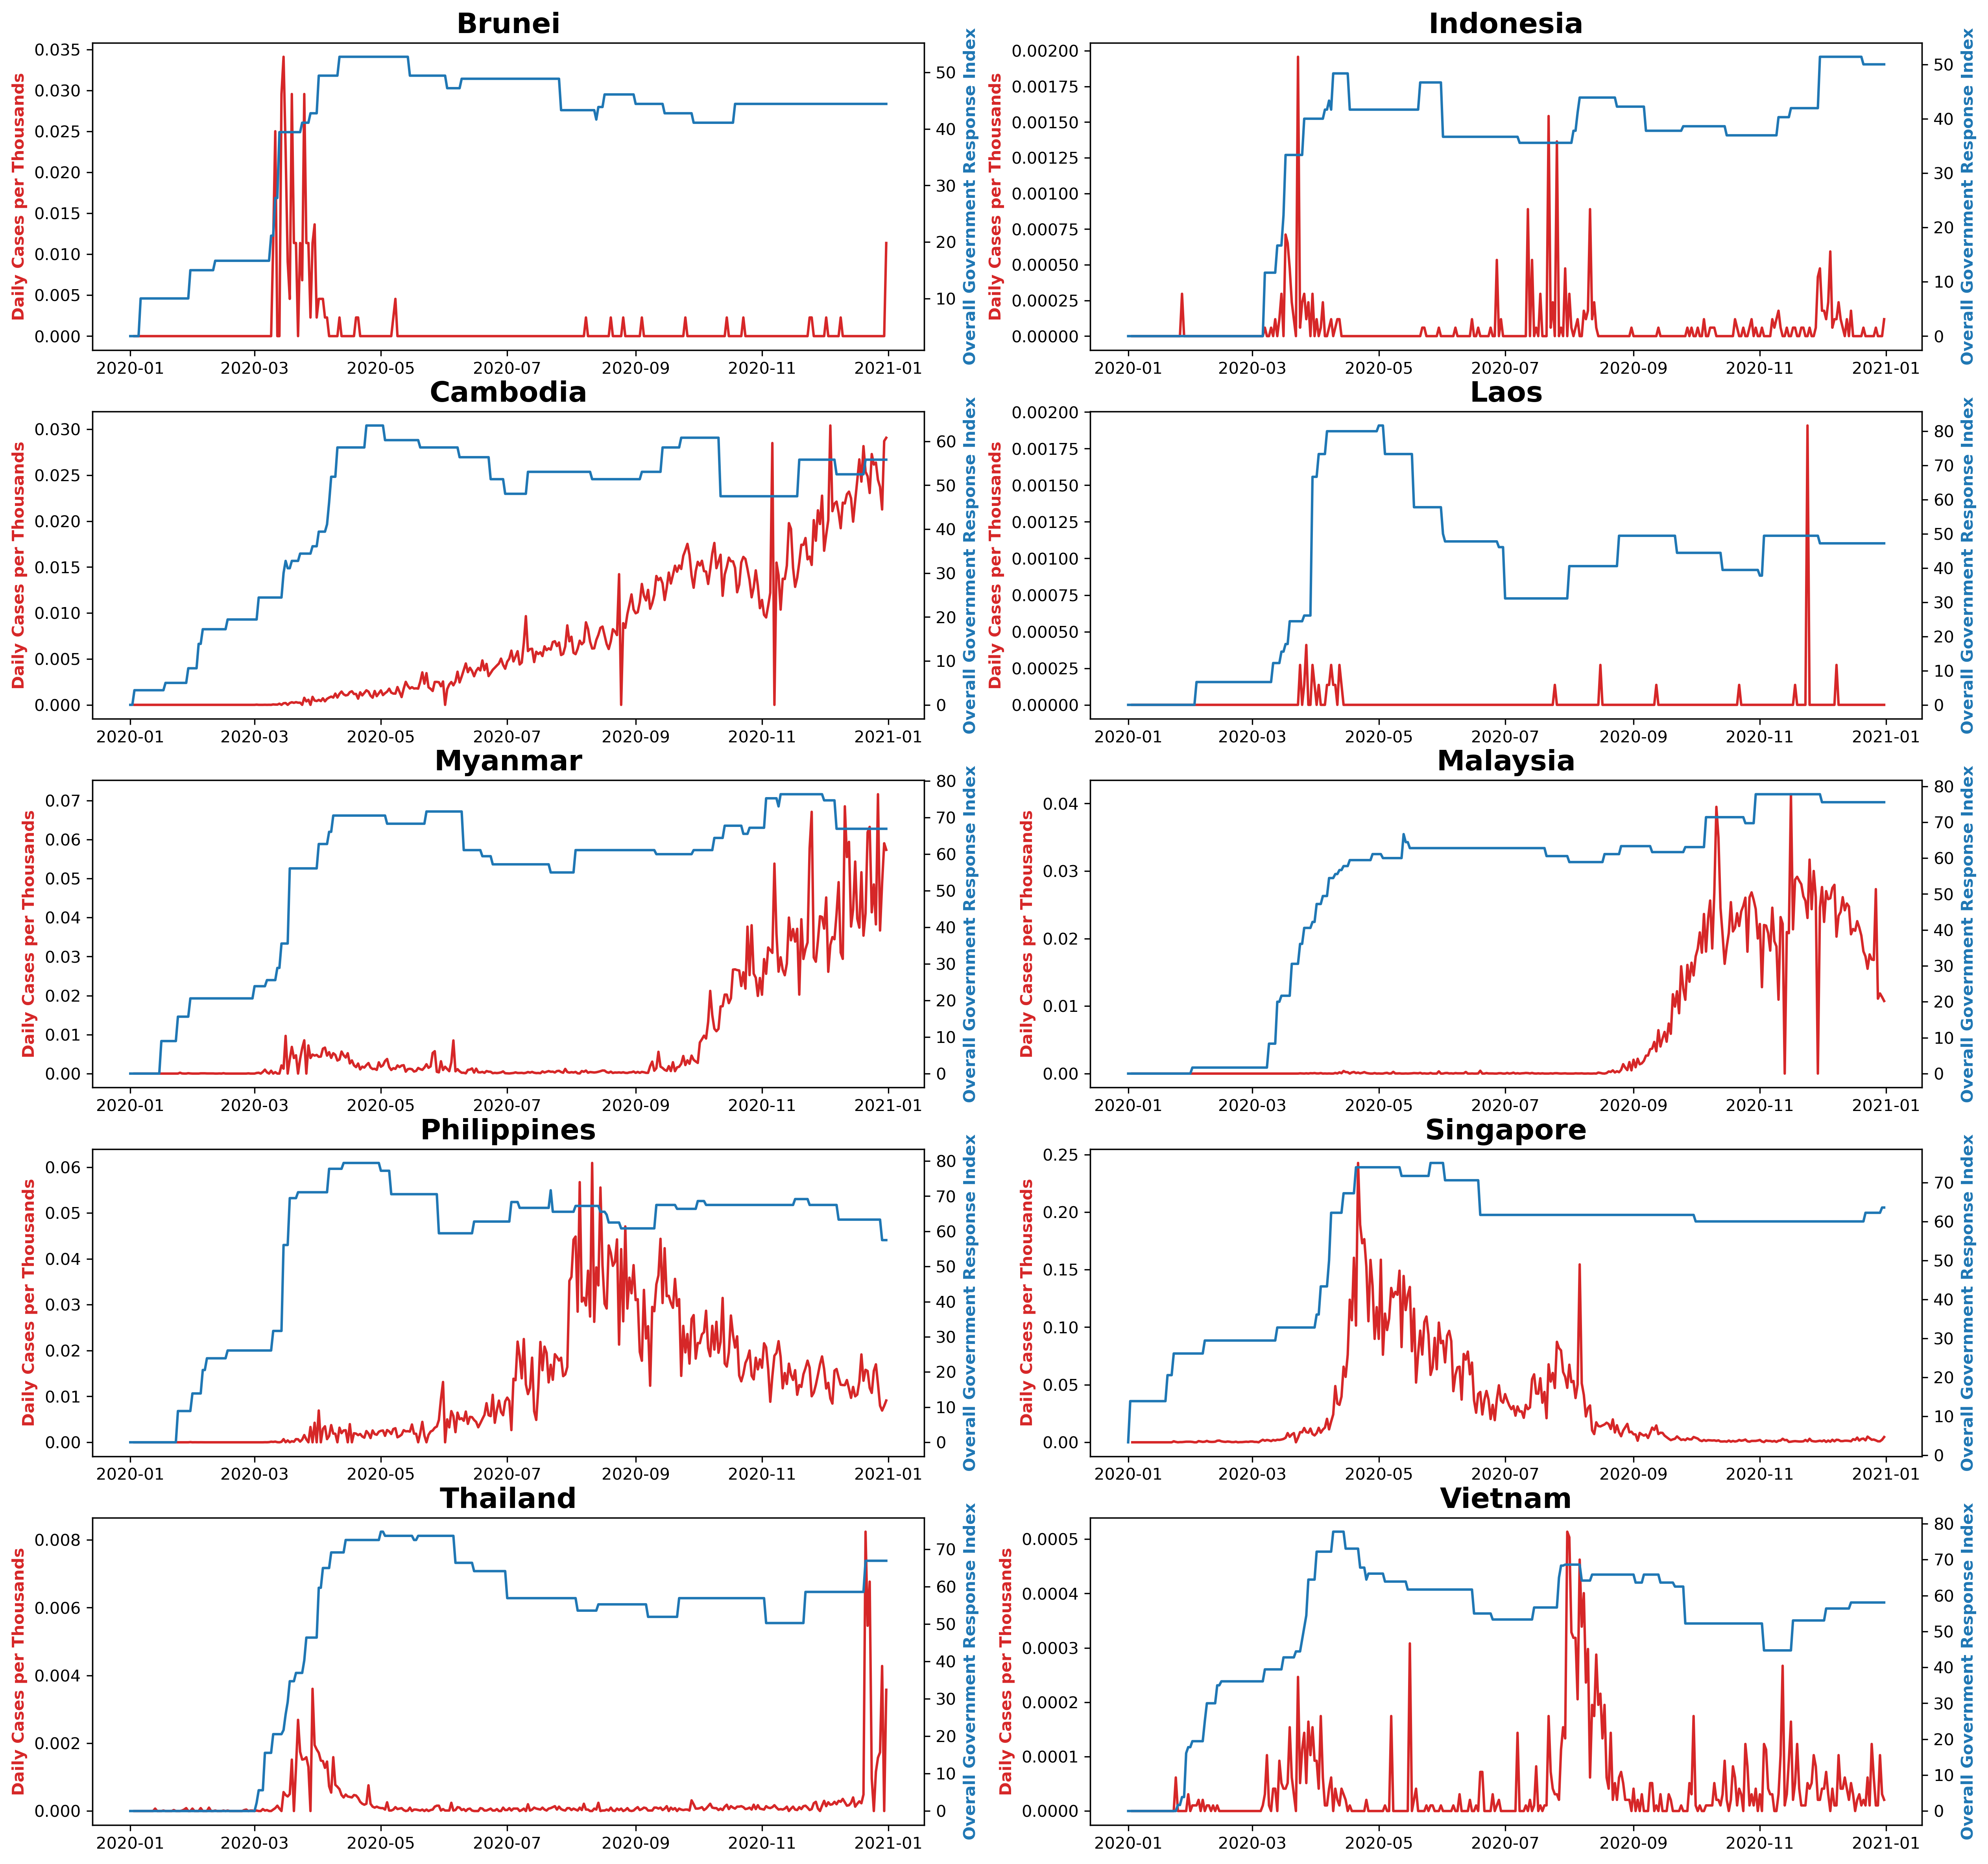

In [30]:
fig = plt.figure(figsize = (20, 20), dpi=300)
i = 0

t_wt = 'bold'
lab_wt = 'semibold'

t_size = 'xx-large'
lab_size = 'large'

row = 5
col = 2
while i < len(covid_df_list):
    ax1 = plt.subplot(row, col, i+1)
    ax1.plot(covid_df_list[i]['New_cases'], label = 'Cumulative Cases per Thousands',
            color = 'tab:red')
    ax1.set_ylabel('Daily Cases per Thousands', color = 'tab:red',
                  fontweight = lab_wt)
    
    ax2 = ax1.twinx()
    ax2.plot(govres_df_nlist[i], label = 'Government Response Score',
            color = 'tab:blue')
    ax2.set_ylabel('Overall Government Response Index', color='tab:blue',
                  fontweight = lab_wt)
    ax2.set_title(govres_df_list[i].name, fontsize = t_size, fontweight = t_wt)
    
    i += 1

plt.show()

**--END--**